Name: John Herrick

# Term Project: Milestone 1

My first milestone of this course's term project is to select a business problem to address. More than that, however, is to find a business problem to address that also has a robust data component as I must ultimately produce a model in my attempt to address this problem. I have selected the problem of cyrptocurrency fraud, or rather the fraud within a particular, noteworthy cryptocurrency: Ethereum. Ethereum is the number two crytpocurrency by marketcap. Marketcap (or market capitilization) is a rough estimate of the popularity and value of a cryptocurrency, which is calculated by multiplying the going exchange rate of a cryptocurrency per unit of its supply by the total of its circulating supply (as of approximately 2:00 PM on 1/17/2023 Ethereum is sitting at a marketcap of $193,526,023,876, USD). Major companies are emerging to program within the space of cryptocurrencies, to facilitate various transactions using these cryptocurrencies, and to validate the transactions occuring with these cryptocurrencies. Regardless of whether a person understands cryptocurrencies, or likes or dislikes them and their effects on our broader national and global marketplaces, the fact remains that there is a tremendous amount of wealth tied up in this sector. Given that various types of transactions occur within the Ethereum blockchain space, detecting fraud is a pressing concern. The nascent character of this developing technological space, as well as the anonymity it affords its participants, coupled with its global reach, make it an ideal place to commit fraud. To address this, I've downloaded an Ethereum Fraud Detection Dataset from Kaggle, which can be found here: [https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset](https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset). This dataset has dozens of columns of data on various Ethereum transactions, along with a 'FLAG' column showing whether or not a given transaction was known to be fraudulent. The business problem I will attempt to address via modeling is determining what factors of Ethereum blockchain transactions can be predictive in determining whether or not a given transaction is fraudulent. The targets of my presentation could be as formal as Coinbase stakeholders attempting to minimize their exposure to, and losses from, fraudulent activity, or persons as commonplace as any individual who takes part in the crypto marketplace. Like understanding email phishing, the potential audience is broad. I will begin by reading my data into a dataframe and performing a brief inspection upon it.

In [2]:
# Importing likely useful modules.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# I've adjusted the display maximum so that I can scroll through the 51 columns of this dataset and assess the likely utility of
# any columns for my future efforts.

pd.set_option('display.max_columns', None)


crypto_df = pd.read_csv("transaction_dataset.csv")
crypto_df

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.050000,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.000000,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.000000,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,2.821060,0.465461,12.200000,9.166365,0.0,0.0,0.0,17,36.665461,36.673777,0.0,0.008316,2.0,1.337000e+00,0.000000e+00,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,1.0,1.337000e+01,0.000000e+00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,218

In [3]:
# Checking the shape of my dataframe.

crypto_df.shape

(9841, 51)

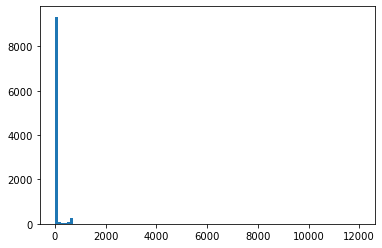

In [4]:
# Starting off with trying to get a feel for the average value sent in a transaction, I began with a simple histogram. Almost 
# all of the values are clustered in the very bottom of the range. Checking a broad description of my data to see what I would
# be working with here.

plt.hist(crypto_df['avg val sent'], bins = 100)
plt.show()

In [5]:
# We see that the bulk of or our values are belwo 22, with a max of 12000. Our 75th percentile of values is just below 22, but
# the 50th percentile of our values is a comparatively small 1.6, which means that were I to try and get a meaningful graph of
# this data, I'd need to limit the range on the x and y axis. The graph is so long on the x-axis because of a small number of 
# outlier values, and so long on the y axis because most of the values exist within a tight range, thus filling a single bucket.


crypto_df['avg val sent'].describe()

count     9841.000000
mean        44.755731
std        239.080215
min          0.000000
25%          0.086184
50%          1.606000
75%         21.999380
max      12000.000000
Name: avg val sent, dtype: float64

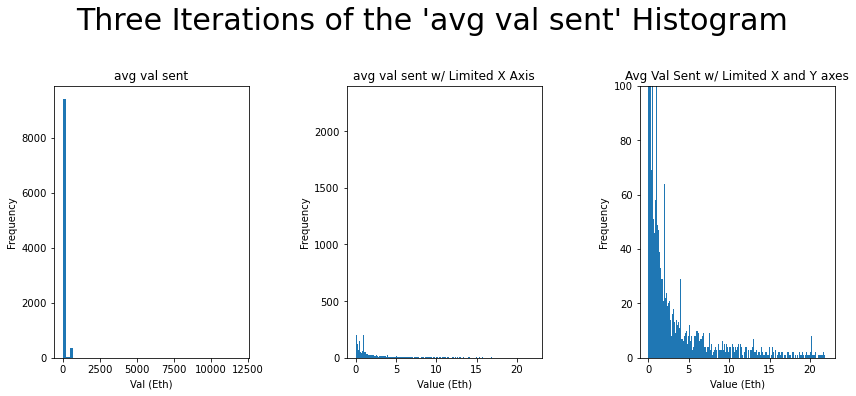

In [6]:
# It can be seen in my three iterations of the 'avg val sent' histogram that almost all of the values occur in a tight range on
# the low end of the spectrum. Properly zooming in on the graph yields a graph that shows roughly what is indicated in the 
# description for this column: much of what occurs happens by a value of 10.

fig, axes = plt.subplots(1,3, figsize = (14,5), squeeze = False)

axes[0,0].hist(crypto_df['avg val sent'], bins = 50)
axes[0,0].set_title("avg val sent")
axes[0,0].set_xlabel("Val (Eth)")
axes[0,0].set_ylabel("Frequency")
axes[0,1].hist(crypto_df['avg val sent'], bins = 500, range = [0,22])
axes[0,1].set_title("avg val sent w/ Limited X Axis")
axes[0,1].set_xlabel("Value (Eth)")
axes[0,1].set_ylabel("Frequency")
axes[0,2].hist(crypto_df['avg val sent'], bins = 500, range = [0,22])
axes[0,2].set_ylim(0,100)
axes[0,2].set_title("Avg Val Sent w/ Limited X and Y axes")
axes[0,2].set_xlabel("Value (Eth)")
axes[0,2].set_ylabel("Frequency")
plt.subplots_adjust(wspace = 0.5)
fig.suptitle("Three Iterations of the 'avg val sent' Histogram", fontsize = 30, y = 1.1)
plt.show()


In [7]:
# Examining the column of 'avg val received' I find the data largely mirrors the 'avg value sent' column. This is interesting
# given the sheer number of crypto transactions that occur globally. Either this small dataset is collected from a fairly 
# self-contained dataset where the same participants are sending and receiving with each other (which would explain this trend)
# or the broader crypto marketplace is dominated by small value transactions. I do see that the max values are marketedly 
# different, which has of course changed the mean, however the overall distribution is largely the same. In the following graph 
# I see a similar graph as I'd noted above.
crypto_df['avg val received'].describe()

count      9841.000000
mean        100.711721
std        2885.002236
min           0.000000
25%           0.426905
50%           1.729730
75%          22.000000
max      283618.831600
Name: avg val received, dtype: float64

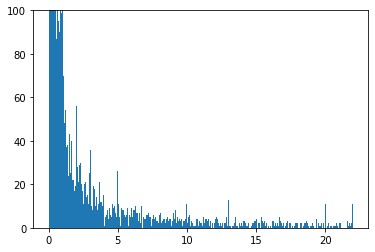

In [8]:
# This graph is similar to the 'avg val sent' graph above.

plt.hist(crypto_df['avg val received'], bins =550, range = [0,22])
plt.ylim(0,100)
plt.show()

I had hoped to have something interesting jump out at me just by examining these columnns, but perhaps what would be useful would be to compare these baseline graphs to the same data but sorted by fraudulent and not fraudulent rows.

In [9]:
# As an indication of the nature of the split between fraudulent and legitmate transactions in this dataset I have checked the
# number of rows flagged as fraudulent and compared them to number of rows flagged as not fraudulent. The data is imbalanced,
# but this imbalance is not nearly as strong as I was worried it would be.

print(f"The number of fraudulent rows is {crypto_df[crypto_df['FLAG']==1]['FLAG'].sum()} and the number of legitimate rows is \
{len(crypto_df[crypto_df['FLAG']==0]['FLAG'])}.")
print("")
print(f"Any prediction model must have an accuracy substantially above \
{round(((crypto_df[crypto_df['FLAG']==1]['FLAG'].sum())/len(crypto_df[crypto_df['FLAG']==0]['FLAG']))*100,2)}% \
to be of any use.")

The number of fraudulent rows is 2179 and the number of legitimate rows is 7662.

Any prediction model must have an accuracy substantially above 28.44% to be of any use.


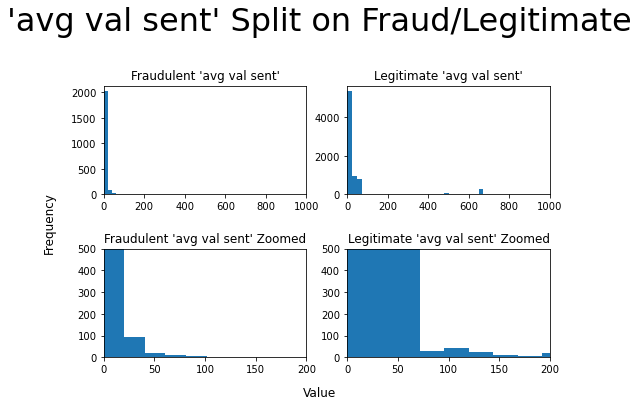

In [10]:
# Examining the graphs for the two split categories, I do see some difference between fraudulent transactions and legitimate 
# transactions for this column ('avg val sent'), notabely that there seems to be a broader range of values for the legitimate 
# transactions, whereas the fraudulent transactions almost entirely sent small amounts of value. This would make sense: if a 
# scammer is attempting to entice large numbers of people to fall for a scheme, they don't want to spend alot of money per 
# attempt. Perhaps I would find more interesting data in the total value received column with a similar fraud/legitmate split.

fraud_val_sent = crypto_df[crypto_df['FLAG'] == 1]['avg val sent']
legit_val_sent = crypto_df[crypto_df['FLAG'] == 0]['avg val sent']

fig,axes = plt.subplots(2,2, figsize = (8,5), squeeze = False)
axes[0,0].hist(fraud_val_sent, bins = 500)
axes[0,0].set_xlim(0,1000)
axes[0,0].set_title("Fraudulent 'avg val sent'")
axes[0,1].hist(legit_val_sent, bins = 500)
axes[0,1].set_xlim(0,1000)
axes[0,1].set_title("Legitimate 'avg val sent'")
axes[1,0].hist(fraud_val_sent, bins = 500)
axes[1,0].set_xlim(0,200)
axes[1,0].set_ylim(0,500)
axes[1,0].set_title("Fraudulent 'avg val sent' Zoomed")
axes[1,1].hist(legit_val_sent, bins = 500)
axes[1,1].set_xlim(0,200)
axes[1,1].set_ylim(0,500)
axes[1,1].set_title("Legitimate 'avg val sent' Zoomed")
fig.supxlabel("Value")
fig.supylabel("Frequency")
fig.suptitle("'avg val sent' Split on Fraud/Legitimate", fontsize = 32, y = 1.1)
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.show()

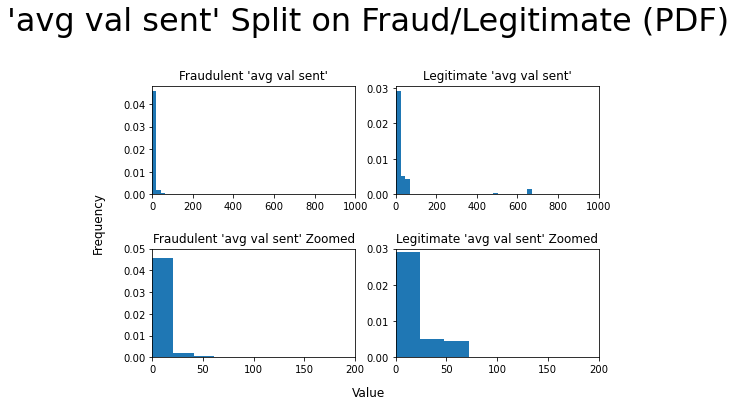

In [11]:
# Repeating my work above, but making a probability density function to see if the comparison between charts would be more 
# meaningful with a normalized Y axis. As can be seen, the graphs don't really change except for the scale on the Y axis is 
# directly comparable across graphs.

fig,axes = plt.subplots(2,2, figsize = (8,5), squeeze = False)
axes[0,0].hist(fraud_val_sent, bins = 500, density = True)
axes[0,0].set_xlim(0,1000)
axes[0,0].set_title("Fraudulent 'avg val sent'")
axes[0,1].hist(legit_val_sent, bins = 500, density = True)
axes[0,1].set_xlim(0,1000)
axes[0,1].set_title("Legitimate 'avg val sent'")
axes[1,0].hist(fraud_val_sent, bins = 500, density = True)
axes[1,0].set_xlim(0,200)
axes[1,0].set_ylim(0,0.05)
axes[1,0].set_title("Fraudulent 'avg val sent' Zoomed")
axes[1,1].hist(legit_val_sent, bins = 500, density = True)
axes[1,1].set_xlim(0,200)
axes[1,1].set_ylim(0,0.03)
axes[1,1].set_title("Legitimate 'avg val sent' Zoomed")
fig.supxlabel("Value")
fig.supylabel("Frequency")
fig.suptitle("'avg val sent' Split on Fraud/Legitimate (PDF)", fontsize = 32, y = 1.1)
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.show()

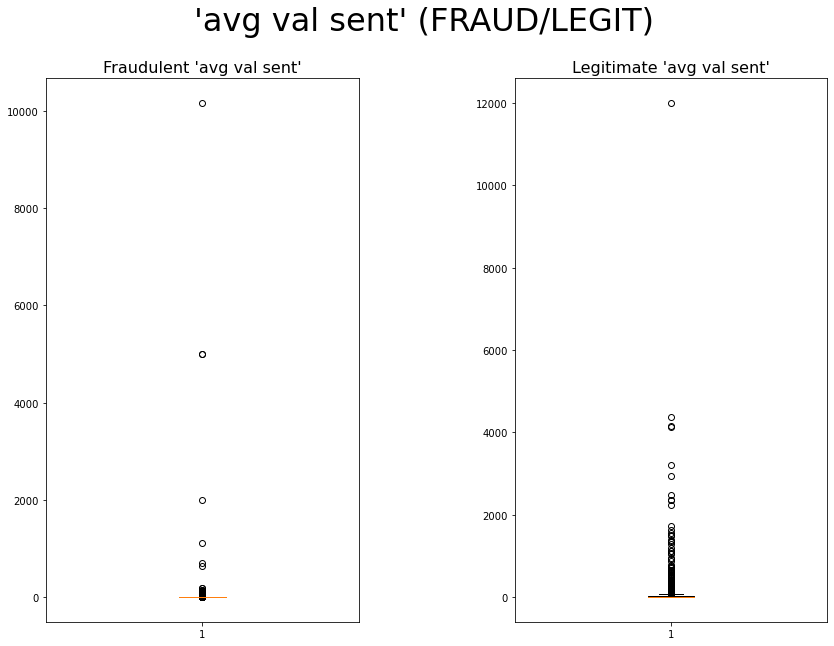

In [12]:
# This is the first of several additions to my milestone #1 step as recommended by my professor in his comments on the grade I
# received for that milestone. He suggested that boxplots would have been useful to my work and as evidenced below they do
# provide an additional layer of information. In my graphs the data has been split on the fraudulent activity and 
# legitimate activity flag, and we can see how the outliers have caused the box in the boxplot (which is where the bulk of the
# datapoints lie) to be compressed to the point of being horizontal lines. Although the distributions of the outliers in the
# two separate graphs are different (suggesting a potentialy useful collection of data for differentiating between fraudulent 
# and legitimate transactions) the substantial vertical space of the graph is made up almost entirely of outliers.

fig, axes = plt.subplots(1, 2, figsize = (14,10))
axes[0].boxplot(fraud_val_sent)
axes[0].set_title("Fraudulent 'avg val sent'", fontsize =16)
axes[1].boxplot(legit_val_sent)
axes[1].set_title("Legitimate 'avg val sent'", fontsize =16)
fig.suptitle("'avg val sent' (FRAUD/LEGIT)", fontsize = 32)
plt.subplots_adjust(wspace = 0.5)
plt.show()

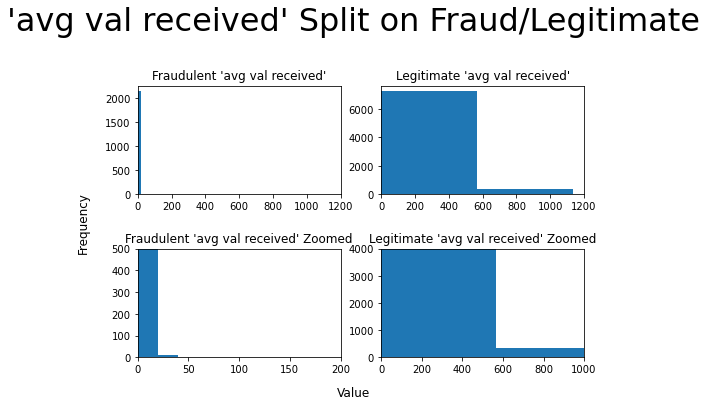

In [13]:
# Here there is a very strong disparity between the fraudulent transactions and the legitimate transactions. There were many
# more instances of substantial value received by addresses who were engaging in legitimate activity than there were for
# addresses flagged for engaging in fraudulent transactions. It would seem that the fraudulent accounts both send and receive
# small amounts, and I suspect the goal is to commit many small instances of fraud that could then add up. Alternatively, 
# fraudulent accounts could be breaking up larger amounts from other addresses into many small amounts sent to other addresses
# for the sake of laundering the crypto. It is too early to claim anything definitive as my analysis has only just begun,
# but it is heartening that I have already found some columns that show meaningful differences between addresses flagged for 
# engaging in fraudulent activity and those who were not. 

fraud_val_received = crypto_df[crypto_df['FLAG'] == 1]['avg val received']
legit_val_received = crypto_df[crypto_df['FLAG'] == 0]['avg val received']

fig,axes = plt.subplots(2,2, figsize = (8,5), squeeze = False)
axes[0,0].hist(fraud_val_received, bins = 500)
axes[0,0].set_xlim(0,1200)
axes[0,0].set_title("Fraudulent 'avg val received'")
axes[0,1].hist(legit_val_received, bins = 500)
axes[0,1].set_xlim(0,1200)
axes[0,1].set_title("Legitimate 'avg val received'")
axes[1,0].hist(fraud_val_received, bins = 500)
axes[1,0].set_xlim(0,200)
axes[1,0].set_ylim(0,500)
axes[1,0].set_title("Fraudulent 'avg val received' Zoomed")
axes[1,1].hist(legit_val_received, bins = 500)
axes[1,1].set_xlim(0,1000)
axes[1,1].set_ylim(0,4000)
axes[1,1].set_title("Legitimate 'avg val received' Zoomed")
fig.supxlabel("Value")
fig.supylabel("Frequency")
fig.suptitle("'avg val received' Split on Fraud/Legitimate", fontsize = 32, y = 1.1)
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.show()

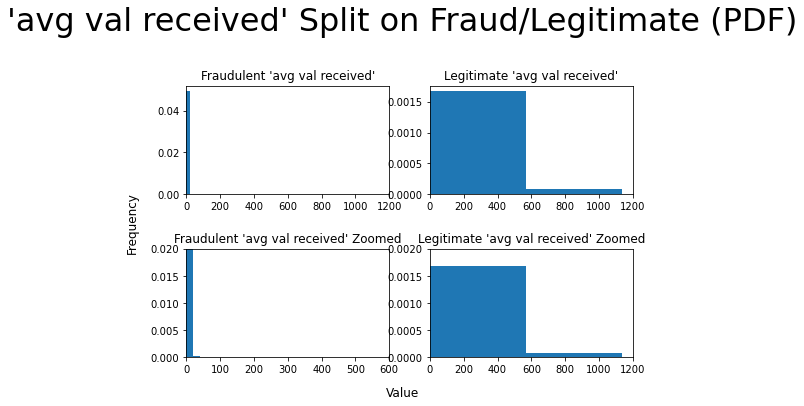

In [14]:
# Repeating the above work, but making probability density function graphs to assess the same data. Given that the histograms 
# are being made using data of disparate sizes, it can be tricky to directly compare the histograms. That being said, although 
# the scales in the histograms are different, the obviously different behaviours of the data still stand out. To cover my bases,
# I felt a pdf would be more technically pleasing and should at least be included as a second glance at the data. However, it is
# worth noting, that the zooming becomes redundant as the normalization of the scale of the y-axis carries out essentially the 
# same function, at least in this case.

fig,axes = plt.subplots(2,2, figsize = (8,5), squeeze = False)
axes[0,0].hist(fraud_val_received, bins = 500, density = True)
axes[0,0].set_xlim(0,1200)
axes[0,0].set_title("Fraudulent 'avg val received'")
axes[0,1].hist(legit_val_received, bins = 500, density = True)
axes[0,1].set_xlim(0,1200)
axes[0,1].set_title("Legitimate 'avg val received'")
axes[1,0].hist(fraud_val_received, bins = 500, density = True)
axes[1,0].set_xlim(0,600)
axes[1,0].set_ylim(0,0.02)
axes[1,0].set_title("Fraudulent 'avg val received' Zoomed")
axes[1,1].hist(legit_val_received, bins = 500, density = True)
axes[1,1].set_xlim(0,1200)
axes[1,1].set_ylim(0,0.002)
axes[1,1].set_title("Legitimate 'avg val received' Zoomed")
fig.supxlabel("Value")
fig.supylabel("Frequency")
fig.suptitle("'avg val received' Split on Fraud/Legitimate (PDF)", fontsize = 32, y = 1.1)
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.show()

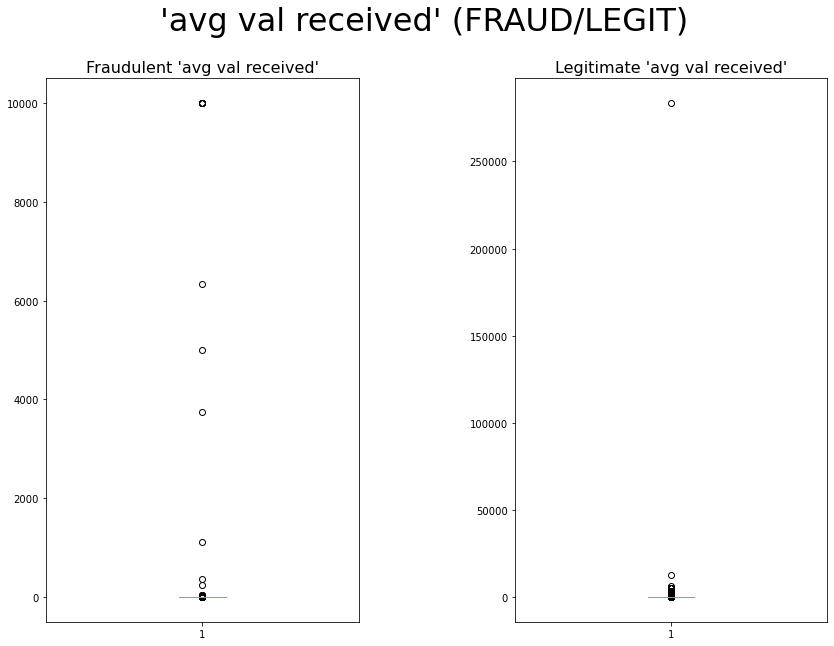

In [15]:
# This is another addition to my first milestone per the recommendations of my professor. It is a boxplot to show the effect of
# the outliers on the data distribution. This has also been split on the flag for fraudulent and legitimate activity. As in 
# all of my added graphs, the box itself in the plot is essentially a horizontal line reflecting the degree of the distortion 
# imparted by the outliers, and though the outliers are fewer in this graph than in any other boxplot, the magnitude of their
# separation from the bulk of the data is readily apparent.

fig, axes = plt.subplots(1, 2, figsize = (14,10))
axes[0].boxplot(fraud_val_received)
axes[0].set_title("Fraudulent 'avg val received'", fontsize =16)
axes[1].boxplot(legit_val_received)
axes[1].set_title("Legitimate 'avg val received'", fontsize =16)
fig.suptitle("'avg val received' (FRAUD/LEGIT)", fontsize = 32)
plt.subplots_adjust(wspace = 0.5)
plt.show()

In [16]:
# Wanting to take my efforts further, I am going to describe the characteristics of the 'avg val sent' and 'avg value received'
# data after being split for fraudulent and legitimate activity. As can be seen, the values for the mean and the 75 percentile
# really stand out between the fraudulent/legitimate splits of the data. The values are much higher for the legitimate category
# than for the fraudulent, as was noticed in the graphs above.

print("Fraudulent Value Sent\n\n",fraud_val_sent.describe(),'\n',"-"*25,'\n\n','Legitimate Value Sent\n\n', 
      legit_val_sent.describe(), '\n',"-"*25,'\n','\n\n','Fraudulent Value Received\n', '\n', 
      fraud_val_received.describe(), '\n',"-"*25,'\n\n', "Legitimate Value Received\n\n", legit_val_received.describe())

Fraudulent Value Sent

 count     2179.000000
mean        16.263756
std        270.486110
min          0.000000
25%          0.000000
50%          0.499139
75%          3.581926
max      10162.666670
Name: avg val sent, dtype: float64 
 ------------------------- 

 Legitimate Value Sent

 count     7662.000000
mean        52.858578
std        228.736821
min          0.000000
25%          0.202771
50%          2.309737
75%         33.666149
max      12000.000000
Name: avg val sent, dtype: float64 
 ------------------------- 
 

 Fraudulent Value Received
 
 count     2179.000000
mean        36.440837
std        557.835910
min          0.000000
25%          0.000000
50%          0.500134
75%          1.082389
max      10000.000000
Name: avg val received, dtype: float64 
 ------------------------- 

 Legitimate Value Received

 count      7662.000000
mean        118.989750
std        3255.859303
min           0.000000
25%           0.704126
50%           3.747374
75%          50.500000
ma

In [17]:
# Carrying on to conduct a similar analysis of the 'Avg min between sent tnx' column, I will split the data between fraudulent
# and legitimate and assess them graphically. First I will describe them to see what kind of zoom would make sense for the 
# graphs. Once again, we see substantial differences in the means and the 75th percentile categories, but also in the 50th
# percentile categories. Next I will examine them graphically. The max obviously dwarfs the other values for both groupings of 
# data, so without any zoom the graphs will likely not convey much.

fraudulent_min_sent = crypto_df[crypto_df['FLAG'] ==1]['Avg min between sent tnx']
legit_min_sent = crypto_df[crypto_df['FLAG'] == 0]['Avg min between sent tnx']

print("Fraudulent Average Minutes Between Sent Transactions\n\n",fraudulent_min_sent.describe(), 
      '\n', '-'*40,'\n\n', "Legitimate Average Minutes Between Sent Transactions\n\n",legit_min_sent.describe())

Fraudulent Average Minutes Between Sent Transactions

 count      2179.000000
mean       3888.109780
std       17505.367743
min           0.000000
25%           0.000000
50%           0.000000
75%         434.095000
max      262976.000000
Name: Avg min between sent tnx, dtype: float64 
 ---------------------------------------- 

 Legitimate Average Minutes Between Sent Transactions

 count      7662.000000
mean       5427.797217
std       22479.761351
min           0.000000
25%           0.000000
50%          22.745000
75%         651.947500
max      430287.670000
Name: Avg min between sent tnx, dtype: float64


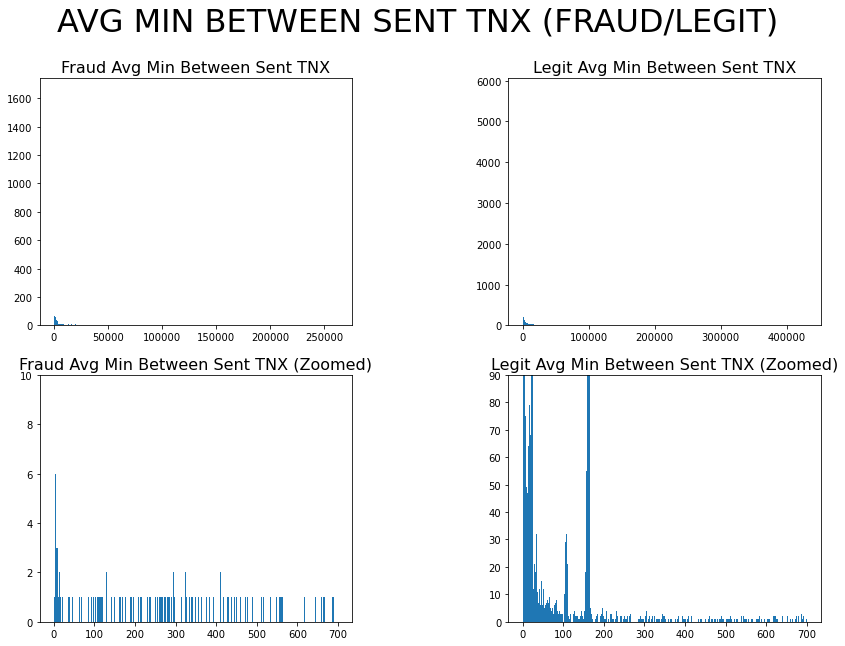

In [18]:
# Note that the y-axis for the second row of plots is not the same between the fraudulent and the legitimate transaction graphs.
# This was done so that data movement could more easily be seen in the first graph as the frequencies of the observed data were
# so minor. Once again the differences between the 'fraudulent' and the 'legitimate' data are noticeable. While I'm not sure 
# exactly why this would be the case, it certainly seems to be that legitimate activities occur most often within 200 minutes,
# with several spikes on the histogram under that cutoff, whereas fraudulent activity doesn't seem to cluster as strongly. 

fig, axes = plt.subplots(2, 2, figsize = (14,10))
axes[0,0].hist(fraudulent_min_sent, bins = 500)
axes[0,0].set_title("Fraud Avg Min Between Sent TNX", fontsize =16)
axes[0,1].hist(legit_min_sent, bins = 600)
axes[0,1].set_title("Legit Avg Min Between Sent TNX", fontsize =16)
axes[1,0].hist(fraudulent_min_sent, bins = 600, range = [0,700])
axes[1,0].set_ylim(0,10)
axes[1,0].set_title("Fraud Avg Min Between Sent TNX (Zoomed)", fontsize =16)
axes[1,1].hist(legit_min_sent, bins = 500, range = [0,700])
axes[1,1].set_ylim(0,90)
axes[1,1].set_title("Legit Avg Min Between Sent TNX (Zoomed)", fontsize =16)
fig.suptitle("AVG MIN BETWEEN SENT TNX (FRAUD/LEGIT)", fontsize = 32)
plt.subplots_adjust(wspace = 0.5)
plt.show()

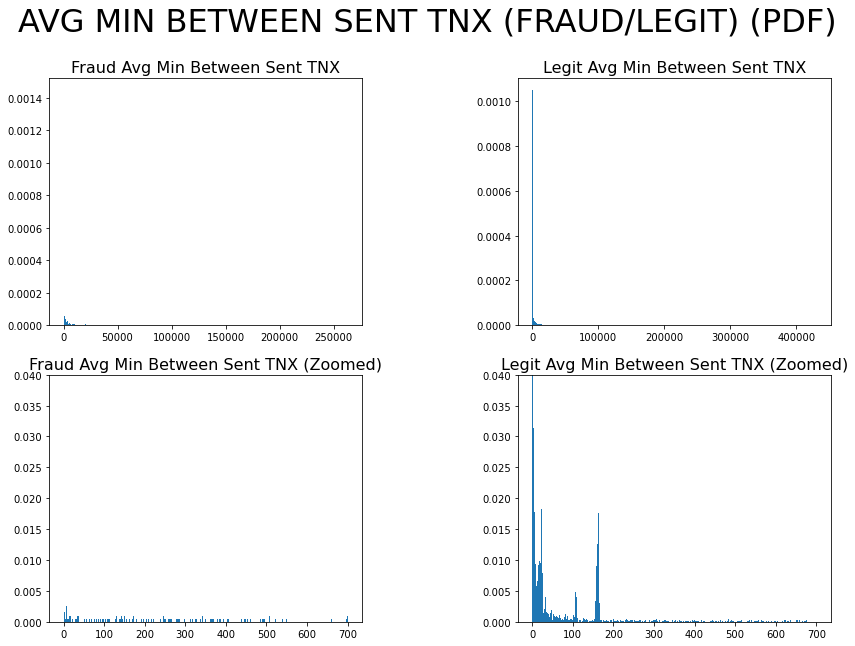

In [19]:
# Creating probability density functions of the previous graphs shows much the same as we'd seen before, though this is more
# technically pleasing as the scales are normalized. I have left the Y axis in the second row of graphs unchanged so that the
# scale differences between the two graphs can be more easily appreciated.

fig, axes = plt.subplots(2, 2, figsize = (14,10))
axes[0,0].hist(fraudulent_min_sent, bins = 500, density = True)
axes[0,0].set_title("Fraud Avg Min Between Sent TNX", fontsize =16)
axes[0,1].hist(legit_min_sent, bins = 600, density = True)
axes[0,1].set_title("Legit Avg Min Between Sent TNX", fontsize =16)
axes[1,0].hist(fraudulent_min_sent, bins = 600, range = [0,700], density = True)
axes[1,0].set_ylim(0,0.04)
axes[1,0].set_title("Fraud Avg Min Between Sent TNX (Zoomed)", fontsize =16)
axes[1,1].hist(legit_min_sent, bins = 500, range = [0,700], density= True)
axes[1,1].set_ylim(0,0.04)
axes[1,1].set_title("Legit Avg Min Between Sent TNX (Zoomed)", fontsize =16)
fig.suptitle("AVG MIN BETWEEN SENT TNX (FRAUD/LEGIT) (PDF)", fontsize = 32)
plt.subplots_adjust(wspace = 0.5)
plt.show()

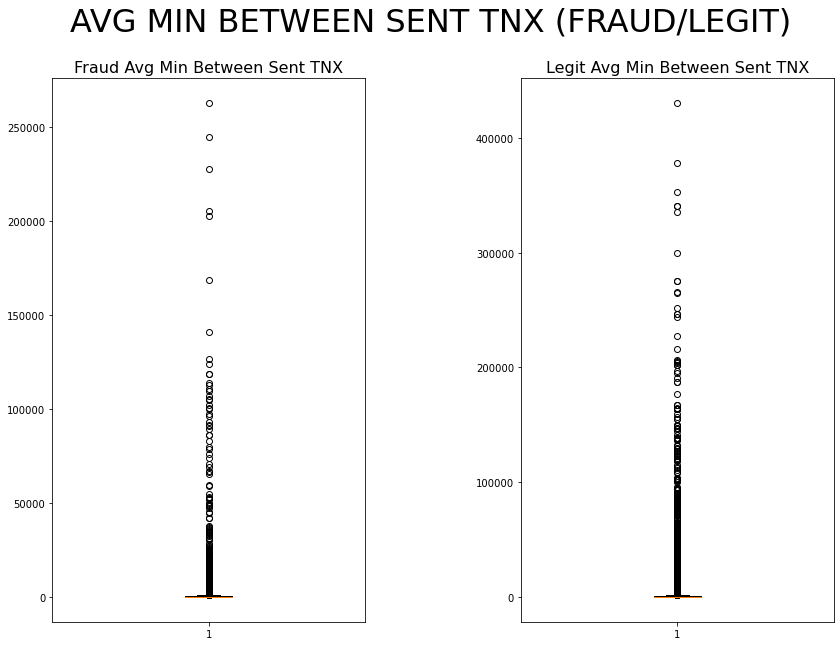

In [20]:
# As noted above, I've been adding boxplots per the recommendation of my professor. This is another such addition. As can be 
# seen, the box itself, which represents the bulk of the datapoints, is compressed to being almost a horizontal line. The 
# outliers then stretch upwards taking up almost all of the vertical space in the graphs. This data has also been split on the
# fraudulent/legitimate flag.

fig, axes = plt.subplots(1, 2, figsize = (14,10))
axes[0].boxplot(fraudulent_min_sent)
axes[0].set_title("Fraud Avg Min Between Sent TNX", fontsize =16)
axes[1].boxplot(legit_min_sent)
axes[1].set_title("Legit Avg Min Between Sent TNX", fontsize =16)
fig.suptitle("AVG MIN BETWEEN SENT TNX (FRAUD/LEGIT)", fontsize = 32)
plt.subplots_adjust(wspace = 0.5)
plt.show()

Having clearly exceeded the requirements for my first milestone, I'll leave the analysis here. What we've seen so far is that there are definite and noticeable differences between fraudulent transactions and legitimate transactions, at least in as far as I've taken my analysis. We've seen that for the columns investigated (average value sent, average value received, and average time between transactions sent) that when the data is split along the line of fraudulent/legitimate their data have very different means, and their percentile data (especially for the 75th percentile) also show marked differences which I hope I'll be able to leverage in the future creation of my logistic regression model to classify Ethereum transactions as either fraudulent or legitimate. In further milestones, I will work towards identifying more columns of interest to my enquiry as well as ultimately creating a model that will ideally predict whether or not transactions on the ethereum blockchain are fraudulent or legitimate. 

# Milestone 2

In [21]:
# For this milestone I am to begin preparing my data for use in an upcoming attempt at predictive modeling. I have many 
# variables to assess, and so I will begin with checking my data for excessive missing or incorrect values and will then move 
# on to feature selection, feature extraction, and any necessary feature creation to aid me in my upcoming work.

In [22]:
# Beginning with an analysis for null values in my dataframe. It seems tha the data is very free of nulls until we reach the 
# ERC 20 tokens, which are tokens on the Ethereum network that comply with a specific standard (of which there are many such 
# tokens that are not Eth, but are on the Ethereum network). There is a remarkable degree of consistency with the number of 
# NaN's in the ERC 20 tokens, with 829 being the number of NaN's except for the last two columns. I shall examine the ERC 20
# NaN's to discern the best way to handle them.

crypto_df.isnull().sum()

Unnamed: 0                                                0
Index                                                     0
Address                                                   0
FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                            

In [23]:
# While carrying out my work to get the appropriate index for the column I am looking for it became apparent that the column 
# names for the ERC20 tokens all have a leading whitespace. I'll remove those whitespaces next.

crypto_df.columns.get_loc(' Total ERC20 tnxs')

26

In [24]:
# Removing leading whitespaces and checking work. Renaming problem columns was successful.

for col in crypto_df.columns:
    crypto_df.rename(columns = {col: col.strip()}, inplace = True)

for col in crypto_df:
    print(col)

Unnamed: 0
Index
Address
FLAG
Avg min between sent tnx
Avg min between received tnx
Time Diff between first and last (Mins)
Sent tnx
Received Tnx
Number of Created Contracts
Unique Received From Addresses
Unique Sent To Addresses
min value received
max value received
avg val received
min val sent
max val sent
avg val sent
min value sent to contract
max val sent to contract
avg value sent to contract
total transactions (including tnx to create contract
total Ether sent
total ether received
total ether sent contracts
total ether balance
Total ERC20 tnxs
ERC20 total Ether received
ERC20 total ether sent
ERC20 total Ether sent contract
ERC20 uniq sent addr
ERC20 uniq rec addr
ERC20 uniq sent addr.1
ERC20 uniq rec contract addr
ERC20 avg time between sent tnx
ERC20 avg time between rec tnx
ERC20 avg time between rec 2 tnx
ERC20 avg time between contract tnx
ERC20 min val rec
ERC20 max val rec
ERC20 avg val rec
ERC20 min val sent
ERC20 max val sent
ERC20 avg val sent
ERC20 min val sent contr

In [25]:
# Suspecting that the bulk of my ERC20 NaN rows may have something to do with fraudulent or legitmate, I filtered my dataframe
# down to only the rows that have both NaN values and show a 'FLAG' value of 1. Turns out I have 829 of those. Considering that
# I have only 2179 rows of fraudulent data, this 829 NaN values could be an issue. That is approximately 38% of my fraudulent 
# data that is missing. Considering that this data exists for almost all of my feature data that could be a problem with my 
# analysis. The remaining few NaN's is not so many that I believe they would harm my analysis. Just to be thorough, in the next 
# cell I'll see how many NaN's exist for the 'FLAG' = 0 option.

crypto_df[crypto_df.isnull().values.any(axis =1) & crypto_df['FLAG']==1]

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
7662,7662,1,0x0020731604c882cf7bf8c444be97d17b19ea4316,1,1457.31,34.12,4815.43,3,13,0,10,3,1.000000,2.501052,1.348445,1.000875,11.277872,5.842916,0.0,0.0,0.0,16,17.528747,17.529785,0.0,0.001037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7666,7666,5,0x005b9f4516f8e640bbe48136901738b323c53b00,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7675,7675,14,0x0153775362c3071c1860e8dbfd53ccc82fa226f5,1,0.00,0.00,15432.58,1,1,0,1,1,1.000000,1.000000,1.000000,0.999538,0.999538,0.999538,0.0,0.0,0.0,2,0.999538,1.000000,0.0,0.000462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7676,7676,15,0x015f17e2851ea392351b7f259e4cfd03dc443cef,1,0.00,0.00,0.00,0,1,0,1,0,0.001540,0.001540,0.001540,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0.000000,0.001540,0.0,0.001540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7678,7678,17,0x0167409e6106ec3e3f05a09fcf04606918d21ad5,1,259.52,2.60,4417.03,17,2,5,2,6,0.003349,0.070000,0.036675,0.000000,0.044494,0.003218,0.0,0.0,0.0,24,0.054714,0.073349,0.0,0.018635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,9831,2170,0xfe9b7db8d9d57e9ad9341bcf51b110ba5d27b48b,1,193.09,81.82,1485.80,6,4,0,3,6,0.000100,8.293050,2.598288,0.312210,7.013525,1.731872,0.0,0.0,0.0,10,10.391234,10.393150,0.0,0.001916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,9833,2172,0xff0e20e3a7575d823302bbb27e233c23f2c3070b,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9834,9834,2173,0xff2f6c6fbd71a078f1c1781855467d30897b5a33,1,0.00,49.51,12643.85,1,15,0,15,1,0.020005,5.000000,1.025080,15.375782,15.375782,15.375782,0.0,0.0,0.0,16,15.375782,15.376202,0.0,0.000420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9835,9835,2174,0xff35866acb80ce4b169d1460cd48108955c1c445,1,0.00,0.00,8427.92,0,1,1,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Only 31 rows with NaN's that are not tied to fraudulent transactions.

crypto_df[crypto_df.isnull().values.any(axis = 1) & (crypto_df['FLAG'] == 0)].shape

(31, 51)

In [27]:
# Examining my columns to see how many are likely to need dummy variables. Most are not dtype object, but 'Address', 'ERC20 most
# sent token type', and 'ERC20_most_rec_token_type' are. I will address those in the coming cells.

for col in crypto_df.columns:
    print(col, crypto_df[col].dtype)

Unnamed: 0 int64
Index int64
Address object
FLAG int64
Avg min between sent tnx float64
Avg min between received tnx float64
Time Diff between first and last (Mins) float64
Sent tnx int64
Received Tnx int64
Number of Created Contracts int64
Unique Received From Addresses int64
Unique Sent To Addresses int64
min value received float64
max value received float64
avg val received float64
min val sent float64
max val sent float64
avg val sent float64
min value sent to contract float64
max val sent to contract float64
avg value sent to contract float64
total transactions (including tnx to create contract int64
total Ether sent float64
total ether received float64
total ether sent contracts float64
total ether balance float64
Total ERC20 tnxs float64
ERC20 total Ether received float64
ERC20 total ether sent float64
ERC20 total Ether sent contract float64
ERC20 uniq sent addr float64
ERC20 uniq rec addr float64
ERC20 uniq sent addr.1 float64
ERC20 uniq rec contract addr float64
ERC20 avg time

In [28]:
# Checking my dataframe for columns that may need dummy variables and came across the 'Address' column. I'm curious how many 
# unique addresses there are, because if there are almost no duplicates, then the data will not be worth anything.

print(f"Number of unique Addresses in Address column = {len(crypto_df['Address'].unique())}, total number of Addresses in  \
dataframe = {len(crypto_df['Address'])}. Repeat Addresses = {len(crypto_df['Address'])-len(crypto_df['Address'].unique())}")

Number of unique Addresses in Address column = 9816, total number of Addresses in  dataframe = 9841. Repeat Addresses = 25


In [29]:
# Checking to see if any of the duplicate addresses would be in my fraudulent category. As it turns out, the amount of 
# potentially useful data is so low, and is completely lopsided. The fact that I have more than one instance of an Address in
# my dataframe doesn't help at all in the broader question of predicting Ethereum fraud either, since more than one transaction 
# at a particular address is something that legitimate and fraudulent accounts perform regularly. As such, in the next cell, I 
# will drop the 'Address' column.

print(f"Number of duplicate addresses in legitimate category: \
{crypto_df[(crypto_df['Address'].duplicated()) & (crypto_df['FLAG'] ==0)].shape[0]}")
print(f"Number of duplicate addresses in fraudulent category: \
{crypto_df[(crypto_df['Address'].duplicated()) & (crypto_df['FLAG'] ==1)].shape[0]}")

Number of duplicate addresses in legitimate category: 25
Number of duplicate addresses in fraudulent category: 0


In [30]:
# Dropping the useless 'Address' column.

crypto_df.drop('Address', axis = 1, inplace = True)

In [31]:
# I also need to setup some dummy variables for the last two columns as they are string objects recording various distinct 
# ERC20 tokens.

crypto_df['ERC20 most sent token type'].unique()

array(['Cofoundit', 'Livepeer Token', 'None', 'Raiden', 'StatusNetwork',
       '0', 'TenXPay', nan, 'blockwell.ai KYC Casper Token', 'EOS', 'ICO',
       'bitqy', 'OmiseGO', 'SONM', 'BAT', 'Melon', 'Friendz Coin',
       'FunFair', 'MKR', 'Golem', 'AION', 'Aragon', 'TokenCard',
       'Crypto.com', 'CRYPTOPUNKS', 'Aigang', 'Bancor', 'ZRX',
       'PangeaCoinICO', 'VeChain', 'Decentraland', 'Mysterium', 'Dochain',
       'SwarmCity', 'BNB', 'Humaniq', 'DGD', 'Storm', 'Patientory',
       'NapoleonX', 'Nexium', 'Qtum', 'district0x', 'Bytom',
       'Identity Hub Token', 'Celsius', 'Reputation', 'Tronix',
       'ViteToken', 'Poker Chips', 'MEX', 'Salt', 'Edgeless', 'SAN',
       'TheDAO', 'Telcoin', 'EduCoin', 'DICE', 'Trustcoin', 'Tokenomy',
       'Veritaseum', 'Time New Bank', 'NimiqNetwork', 'Kin', 'UG Token',
       'SNGLS', 'BlockchainPoland', 'Monetha', 'Propy', 'Republic',
       'Civic', 'Storj', 'Loom', 'DATAcoin', 'ChainLink Token',
       'Ether Token', 'Guaranteed Entrance 

In [32]:
# Setting up dummy variables for the 'ERC20 most sent token typ' column and dropping the original column.

dummies = pd.get_dummies(crypto_df['ERC20 most sent token type'], prefix = 'ERC20_Sent_Token_')
crypto_df = pd.concat([crypto_df, dummies], axis = 1)
crypto_df.drop('ERC20 most sent token type', inplace = True, axis = 1)
crypto_df

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20_most_rec_token_type,ERC20_Sent_Token__,ERC20_Sent_Token__,ERC20_Sent_Token__$7RIP$,ERC20_Sent_Token__'',ERC20_Sent_Token__0,ERC20_Sent_Token__0xBitcoin Token,ERC20_Sent_Token__0xcert Protocol Token,ERC20_Sent_Token__1World,ERC20_Sent_Token__300 Token,ERC20_Sent_Token__AION,ERC20_Sent_Token__ARBITRAGE,ERC20_Sent_Token__AVT,ERC20_Sent_Token__AdBank,ERC20_Sent_Token__AdEx,ERC20_Sent_Token__Aditus,ERC20_Sent_Token__Adshares,ERC20_Sent_Token__Aeron,ERC20_Sent_Token__Aeternity,ERC20_Sent_Token__Aigang,ERC20_Sent_Token__AirSwap,ERC20_Sent_Token__AirToken,ERC20_Sent_Token__AnyCoinVer10,ERC20_Sent_Token__AppCoins,ERC20_Sent_Token__Aragon,ERC20_Sent_Token__ArcBlock,ERC20_Sent_Token__Arcona Distribution Contract,ERC20_Sent_Token__Authorship,ERC20_Sent_Token__BAI,ERC20_Sent_Token__BANCA,ERC20_Sent_Token__BANKEX,ERC20_Sent_Token__BAT,ERC20_Sent_Token__BCDN,ERC20_Sent_Token__BCG.to,ERC20_Sent_Token__BCShareS,ERC20_Sent_Token__BIX Token,ERC20_Sent_Token__BMChain Token,ERC20_Sent_Token__BNB,ERC20_Sent_Token__BOMB,ERC20_Sent_Token__BUZCOIN,ERC20_Sent_Token__Bancor,ERC20_Sent_Token__Banker Token,ERC20_Sent_Token__BinaryCoin,ERC20_Sent_Token__BitDice,ERC20_Sent_Token__BizCoin,ERC20_Sent_Token__Blackmoon Crypto Token,ERC20_Sent_Token__BlockchainPoland,ERC20_Sent_Token__Blocktix,ERC20_Sent_Token__Bounty0x,ERC20_Sent_Token__Brickblock,ERC20_Sent_Token__Bytom,ERC20_Sent_Token__CCRB,ERC20_Sent_Token__CRYPTOPUNKS,ERC20_Sent_Token__Cai Token,ERC20_Sent_Token__CarTaxi,ERC20_Sent_Token__Cashaa,ERC20_Sent_Token__Celsius,ERC20_Sent_Token__Centra,ERC20_Sent_Token__ChainLink Token,ERC20_Sent_Token__ChangeBank,ERC20_Sent_Token__CharterCoin,ERC20_Sent_Token__Cindicator,ERC20_Sent_Token__Civic,ERC20_Sent_Token__Cobinhood,ERC20_Sent_Token__Cofoundit,ERC20_Sent_Token__CoinBene Coin,ERC20_Sent_Token__CoinBoin,ERC20_Sent_Token__CoinDash,ERC20_Sent_Token__Countinghouse Fund,ERC20_Sent_Token__Covalent Token,ERC20_Sent_Token__Covesting,ERC20_Sent_Token__Crypterium,ERC20_Sent_Token__Crypto.com,ERC20_Sent_Token__Crypto20,ERC20_Sent_Token__CryptoLah,ERC20_Sent_Token__Cryptonex,ERC20_Sent_Token__CultureVirtue,ERC20_Sent_Token__DADI,ERC20_Sent_Token__DAPSTOKEN,ERC20_Sent_Token__DATAcoin,ERC20_Sent_Token__DCORP,ERC20_Sent_Token__DGD,ERC20_Sent_Token__DICE,ERC20_Sent_Token__DNA,ERC20_Sent_Token__DRC Token,ERC20_Sent_Token__DRP Utility,ERC20_Sent_Token__Dai Stablecoin v1.0,ERC20_Sent_Token__Dao.Casino,ERC20_Sent_Token__Decent.Bet Token,ERC20_Sent_Token__Decentraland,ERC20_Sent_Token__Decentralized Application Coin,ERC20_Sent_Token__Delta,ERC20_Sent_Token__Dentacoin,ERC20_Sent_Token__Digix Gold Token,ERC20_Sent_Token__Divi Exchange Token,ERC20_Sent_Token__Dochain,ERC20_Sent_Token__Dragon,ERC20_Sent_Token__E4ROW,ERC20_Sent_Token__ELF,ERC20_Sent_Token__EOS,ERC20_Sent_Token__ERC20,ERC20_Sent_Token__ETHWrapper,ERC20_Sent_Token__Edgeless,ERC20_Sent_Token__EduCoin,ERC20_Sent_Token__Electroni

In [33]:
# Assessing need for dummy variables in the 'ERC20_most_rec_token_type' column.

crypto_df['ERC20_most_rec_token_type'].unique()

array(['Numeraire', 'Livepeer Token', 'XENON', 'EOS', '0', 'AICRYPTO',
       'DATAcoin', 'PoSToken', 'KyberNetwork', 'None', 'Bancor',
       'OmiseGO', 'ONOT', 'Tronix', 'StatusNetwork',
       'SAFE.AD - 20% DISCOUNT UNTIL 1 MAY', nan, 'Storj', 'bitqy',
       'Beauty Coin', 'SONM', 'NEVERDIE', 'INS Promo', 'TenXPay',
       'Cybereits Token', 'FunFair', 'DGD', 'iEx.ec Network Token',
       'AION', 'Aragon', 'Cofoundit', 'Golem', 'CRYPTOPUNKS', 'Nitro',
       'Ether Token', 'VeChain', 'Reputation', 'Intelion', 'Dochain',
       'SwarmCity', 'BAT', 'LockTrip', 'Humaniq', 'KickCoin', 'BOX Token',
       'MobileGo', 'Monaco', 'Azbit', 'Nexium', 'ZGC', 'www.pnztrust.com',
       'Send your ETH to this contract and earn 2.55% every day for Live-long. https://255eth.club',
       'empowr', 'An Etheal Promo', 'BitClave', 'Bytom',
       'Identity Hub Token', 'Celsius', 'Raiden', 'Trustcoin', 'ARP',
       'Qtum', 'Poker Chips', 'Loopring', 'Penta Network Token', 'Salt',
       'ICONOMI',

In [34]:
# Creating dummy variables for the 'ERC20_most_rec_token_type' column and dropping the original.

dummies = pd.get_dummies(crypto_df['ERC20_most_rec_token_type'], prefix = 'ERC20_Rec_Token_')
crypto_df = pd.concat([crypto_df, dummies], axis = 1)
crypto_df.drop('ERC20_most_rec_token_type', inplace = True, axis = 1)
crypto_df

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20_Sent_Token__,ERC20_Sent_Token__,ERC20_Sent_Token__$7RIP$,ERC20_Sent_Token__'',ERC20_Sent_Token__0,ERC20_Sent_Token__0xBitcoin Token,ERC20_Sent_Token__0xcert Protocol Token,ERC20_Sent_Token__1World,ERC20_Sent_Token__300 Token,ERC20_Sent_Token__AION,ERC20_Sent_Token__ARBITRAGE,ERC20_Sent_Token__AVT,ERC20_Sent_Token__AdBank,ERC20_Sent_Token__AdEx,ERC20_Sent_Token__Aditus,ERC20_Sent_Token__Adshares,ERC20_Sent_Token__Aeron,ERC20_Sent_Token__Aeternity,ERC20_Sent_Token__Aigang,ERC20_Sent_Token__AirSwap,ERC20_Sent_Token__AirToken,ERC20_Sent_Token__AnyCoinVer10,ERC20_Sent_Token__AppCoins,ERC20_Sent_Token__Aragon,ERC20_Sent_Token__ArcBlock,ERC20_Sent_Token__Arcona Distribution Contract,ERC20_Sent_Token__Authorship,ERC20_Sent_Token__BAI,ERC20_Sent_Token__BANCA,ERC20_Sent_Token__BANKEX,ERC20_Sent_Token__BAT,ERC20_Sent_Token__BCDN,ERC20_Sent_Token__BCG.to,ERC20_Sent_Token__BCShareS,ERC20_Sent_Token__BIX Token,ERC20_Sent_Token__BMChain Token,ERC20_Sent_Token__BNB,ERC20_Sent_Token__BOMB,ERC20_Sent_Token__BUZCOIN,ERC20_Sent_Token__Bancor,ERC20_Sent_Token__Banker Token,ERC20_Sent_Token__BinaryCoin,ERC20_Sent_Token__BitDice,ERC20_Sent_Token__BizCoin,ERC20_Sent_Token__Blackmoon Crypto Token,ERC20_Sent_Token__BlockchainPoland,ERC20_Sent_Token__Blocktix,ERC20_Sent_Token__Bounty0x,ERC20_Sent_Token__Brickblock,ERC20_Sent_Token__Bytom,ERC20_Sent_Token__CCRB,ERC20_Sent_Token__CRYPTOPUNKS,ERC20_Sent_Token__Cai Token,ERC20_Sent_Token__CarTaxi,ERC20_Sent_Token__Cashaa,ERC20_Sent_Token__Celsius,ERC20_Sent_Token__Centra,ERC20_Sent_Token__ChainLink Token,ERC20_Sent_Token__ChangeBank,ERC20_Sent_Token__CharterCoin,ERC20_Sent_Token__Cindicator,ERC20_Sent_Token__Civic,ERC20_Sent_Token__Cobinhood,ERC20_Sent_Token__Cofoundit,ERC20_Sent_Token__CoinBene Coin,ERC20_Sent_Token__CoinBoin,ERC20_Sent_Token__CoinDash,ERC20_Sent_Token__Countinghouse Fund,ERC20_Sent_Token__Covalent Token,ERC20_Sent_Token__Covesting,ERC20_Sent_Token__Crypterium,ERC20_Sent_Token__Crypto.com,ERC20_Sent_Token__Crypto20,ERC20_Sent_Token__CryptoLah,ERC20_Sent_Token__Cryptonex,ERC20_Sent_Token__CultureVirtue,ERC20_Sent_Token__DADI,ERC20_Sent_Token__DAPSTOKEN,ERC20_Sent_Token__DATAcoin,ERC20_Sent_Token__DCORP,ERC20_Sent_Token__DGD,ERC20_Sent_Token__DICE,ERC20_Sent_Token__DNA,ERC20_Sent_Token__DRC Token,ERC20_Sent_Token__DRP Utility,ERC20_Sent_Token__Dai Stablecoin v1.0,ERC20_Sent_Token__Dao.Casino,ERC20_Sent_Token__Decent.Bet Token,ERC20_Sent_Token__Decentraland,ERC20_Sent_Token__Decentralized Application Coin,ERC20_Sent_Token__Delta,ERC20_Sent_Token__Dentacoin,ERC20_Sent_Token__Digix Gold Token,ERC20_Sent_Token__Divi Exchange Token,ERC20_Sent_Token__Dochain,ERC20_Sent_Token__Dragon,ERC20_Sent_Token__E4ROW,ERC20_Sent_Token__ELF,ERC20_Sent_Token__EOS,ERC20_Sent_Token__ERC20,ERC20_Sent_Token__ETHWrapper,ERC20_Sent_Token__Edgeless,ERC20_Sent_Token__EduCoin,ERC20_Sent_Token__Electronic Energy Coin,ERC20_Sent_T

In [35]:
# It is possible that my logistic regression would be improved by including the data with a substantial amount of missing 
# ERC20 data in the target, but I could also see including that data as leading to accuracy problems down the road. I will 
# move forward with separate dataframes: one retaining the NaN data, and one from wich all of those rows are dropped, and one 
# from which the columns containing the NaN's are dropped. In this way, when modeling is actually undertaken, the utilty of the 
# ERC20 tokens can be assessed, and the susceptibility of the model to influence by NaN's in the target can be assessed as well.
# Checking my work creating the new dataframes.

crypto_no_erc = crypto_df.iloc[:, :25]
crypto_no_row = crypto_df.dropna()

print(crypto_no_erc.isnull().sum(), crypto_no_row.isnull().sum())
print('\n', '-'*100)
print(crypto_no_erc.shape, crypto_no_row.shape)

Unnamed: 0                                              0
Index                                                   0
FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent

In [36]:
# Now I will break my dataframes into feature and target data. I am also removing the 'Index' and 'Unnamed: 0' columns as they 
# will provide no useful information for the generation of the model.

crypto_df_features = crypto_df.drop('FLAG', axis = 1)
crypto_df_features.drop(['Unnamed: 0', 'Index'], axis = 1, inplace = True)
crypto_df_target = crypto_df['FLAG']

no_erc_features = crypto_no_erc.drop('FLAG', axis = 1)
no_erc_features.drop(['Unnamed: 0', 'Index'], axis = 1, inplace = True)
no_erc_target = crypto_no_erc['FLAG']

no_rows_features = crypto_no_row.drop('FLAG', axis = 1)
no_rows_features.drop(['Unnamed: 0', 'Index'], axis = 1, inplace = True)
no_rows_target = crypto_no_row['FLAG']

In [37]:
# Running an RFECV analysis on my no_erc_features dataframe to see what features it recommends I keep.

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

logreg = LogisticRegression(random_state = 10, solver = 'liblinear')

standardizer = StandardScaler()

no_erc_features_standardized = standardizer.fit_transform(no_erc_features)

rfecv = RFECV(estimator = logreg, step =1, cv =5)
rfecv.fit(no_erc_features_standardized, no_erc_target)
rfecv.transform(no_erc_features_standardized)

array([[ 0.79909927],
       [-0.02896469],
       [-0.1504669 ],
       ...,
       [-0.06462295],
       [-0.15310825],
       [-0.12933608]])

In [38]:
# Checking to see which features the rfecv suggest I keep. Turns out its only a single feature, and it is feature 4. That would
# be index 3, I will check its identity in the next cell.

rfecv.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [39]:
# The recursive feature elimination with cross validation has suggested I keep only one feature and that is 'Sent tnx'.

print(f"Per the RFECV, the only feature useful in the logistic regression was '{no_erc_features.columns[3]}'.")

Per the RFECV, the only feature useful in the logistic regression was 'Sent tnx'.


In [40]:
# In the event I wanted to the top ranked columns, then I could keep the top five ranked from this list.

column_list = rfecv.ranking_
column_list

index_list = [3, 2, 13, 11, 7]

top_5_no_erc_list = []

for col in index_list:
    top_5_no_erc_list.append(no_erc_features.columns[col])
    
top_5_no_erc_list

['Sent tnx',
 'Time Diff between first and last (Mins)',
 'avg val sent',
 'min val sent',
 'Unique Sent To Addresses']

In [41]:
# Moving on to an RFECV analysis of my no_rows_features dataframe.

logreg2 = LogisticRegression(random_state = 10, solver = 'liblinear', n_jobs = -1)

standardizer2 = StandardScaler()

no_rows_features_standardized = standardizer2.fit_transform(no_rows_features)

rfecv2 = RFECV(estimator = logreg, step =1, cv =5, n_jobs = -1)
rfecv2.fit(no_rows_features_standardized, no_rows_target)
rfecv2.transform(no_rows_features_standardized)

array([[-0.3050602 ,  1.41687816,  0.75216515, ..., -0.07469345,
        -0.03800796, -0.04083163],
       [-0.22632589,  2.96594128, -0.04109137, ..., -0.07469345,
        -0.03800796, -0.04083163],
       [-0.24846842,  0.84949701, -0.15748626, ..., -0.07469345,
        -0.03800796, -0.04083163],
       ...,
       [-0.35123981, -0.70951705, -0.16001659, ..., -0.07469345,
        -0.03800796, -0.04083163],
       [-0.25880163,  0.07975697, -0.07525074, ..., -0.07469345,
        -0.03800796, -0.04083163],
       [-0.34492495,  1.31439305, -0.13724367, ..., -0.07469345,
        -0.03800796, -0.04083163]])

In [42]:
# Examining the results of the RFECV analysis of my no_rows_features dataframe.

rfecv2.support_

array([False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False,

In [43]:
# It seems that this dataframe has selected 50 features for use in my model. This suggests that including the ERC20 columns is
# a non-trivial difference, though I have yet to ascertain the overall efficacy of a model generated from either of the 
# presently created feature sets. This took such a long time to run (approximately 1.5 hours, probably because I set cv =5 and
# had such a large dataset) that I saved the output of rfecv2.ranking_ and rfecv.support_ to csv files on my laptop so that if
# I ever had to re-run the notebook again I could skip running that computationally longwinded cell, at least until just before
# I turn it in so that I would have the proper output proving I did it at all in the first place. 

rfecv2.support_.sum()       

50

In [44]:
# Getting a ranking of all of the useful features. There are many that show '1'. I will collect them in a list.

column_list2 = rfecv2.ranking_
column_list2

array([ 16,   1,   1,   1,   1,   1,   1,   1, 709, 340, 352, 634,  10,
       418, 618, 517, 641,   1, 221, 304, 586, 500,   1, 639, 283, 563,
         1,   1, 384,  34, 764, 762, 766, 765, 273, 572, 126, 293,  55,
       246, 767, 763, 768,   1,   1,   1,   1, 355, 150,   1, 589, 560,
       701, 719,  81, 135, 413, 715,  70, 723, 371, 272, 268, 574, 463,
       416, 617, 406,  84, 457, 568, 508, 438, 646, 699, 165, 537, 475,
       694, 661, 624, 309, 380,  54,   1, 607,  46, 175,  75,  52, 460,
        95,   7,  26, 451, 759, 739, 369, 100, 174, 691, 375, 363, 114,
       732, 697, 290, 548, 288, 527, 651, 234, 577, 417, 601, 230,   1,
       653, 403, 310, 354, 168, 591,  36, 269, 111,   1, 713, 666, 236,
       171, 282, 472, 289, 412, 407, 445, 458, 642, 662, 655, 556, 747,
        45,  41, 415, 597, 626,  58, 411, 716, 419,   1, 491, 284, 664,
       326,  12, 125,  59, 606, 292, 112, 707, 115, 344, 301, 237, 726,
       482, 119, 753, 702, 722, 229, 635, 541, 308,  98, 356,  6

In [45]:
# Converting this ranking into a list of indexes so that I can retrieve the feature names.

index_list_no_rows = []

for index, item in enumerate(column_list2):
    if item == 1:
        index_list_no_rows.append(index)
        
print(index_list_no_rows)

[1, 2, 3, 4, 5, 6, 7, 17, 22, 26, 27, 43, 44, 45, 46, 49, 84, 116, 126, 152, 218, 230, 252, 256, 266, 291, 309, 313, 324, 325, 351, 353, 375, 388, 424, 504, 505, 535, 544, 573, 604, 648, 651, 681, 700, 710, 734, 766, 770, 781]


In [46]:
# Converting my feature names into a list. Turns out the ERC20 columns are useful after all. I will try a PCA analysis on the
# dataframe without the large number of ERC20 NaN's removed, but I anticipate I will be using the no_rows_features dataframe
# for my final analysis as it overlaps with the results of the no_erc_features dataframe and then adds more information. I will
# of course be trimming the dataset down to only the necessary features prior to model building as the no_rows_features 
# dataframe is so massive.

for item in index_list_no_rows:
    print(no_rows_features.columns[item])
print('', '-'*100)    
print(f"The number of features in the list as numbered '1' are equal to the number of features recommended by the\n\
rfecv2.support_ output, which is to say {len(index_list_no_rows)}.")

Avg min between received tnx
Time Diff between first and last (Mins)
Sent tnx
Received Tnx
Number of Created Contracts
Unique Received From Addresses
Unique Sent To Addresses
total transactions (including tnx to create contract
Total ERC20 tnxs
ERC20 uniq sent addr
ERC20 uniq rec addr
ERC20 uniq sent token name
ERC20 uniq rec token name
ERC20_Sent_Token__
ERC20_Sent_Token__ 
ERC20_Sent_Token__0
ERC20_Sent_Token__Bancor
ERC20_Sent_Token__Crypto.com
ERC20_Sent_Token__DICE
ERC20_Sent_Token__Ether
ERC20_Sent_Token__MobileGo
ERC20_Sent_Token__None
ERC20_Sent_Token__Pundi X Token
ERC20_Sent_Token__Qtum
ERC20_Sent_Token__Reputation
ERC20_Sent_Token__TAAS
ERC20_Sent_Token__Tronix
ERC20_Sent_Token__UG Token
ERC20_Sent_Token__WIKI Token
ERC20_Sent_Token__WINGS
ERC20_Rec_Token__ 
ERC20_Rec_Token__0
ERC20_Rec_Token__Aragon
ERC20_Rec_Token__BAT
ERC20_Rec_Token__Blockwell say NOTSAFU
ERC20_Rec_Token__EOS
ERC20_Rec_Token__ERC20
ERC20_Rec_Token__Free BOB Tokens - BobsRepair.com
ERC20_Rec_Token__GSENe

Having attempted to perform PCA and RFECV on my crypto_df_features data, I've run into errors which I'll demonstrate below. The errors all come from their being NaN or infinity values in the data that the feature extraction and feature selection algorithms cannot tolerate. I could impute values to these columns and rows, but there are a large number of NaN's (over 800 in all of the ERC20 columns). Furthermore, these are almost entirely associated with the target data (i.e., data that is 'FLAG' = 1) which only has 2179 total rows, and the number of legitimate rows is 7662. Creating false, or imputed, data for such a large portion of the target data would likely cause more harm than good, especially in the dummy variable categories. As such, given that my analysis on the dataframe that included the columns from the ERC20 data but not the rows with NaN's produced 50 useful features, and the dataframe with all of its rows but none of the ERC20 columns produced only one useful feature, the no_rows dataframe and its derivative dataframes are the dataframes I will be using.

In [48]:
# Here is the proof of my error due ot NaN's for the REFCV algorithm. At the bottom it states: "ValueError: Input contains NaN, 
# infinity or a value too large for dtype('float64')."

logreg3 = LogisticRegression(random_state = 10, solver = 'liblinear', n_jobs = -1)

standardizer3 = StandardScaler()

crypto_df_features_standardized = standardizer3.fit_transform(crypto_df_features)

rfecv3 = RFECV(estimator = logreg, step =1, cv =5, n_jobs = -1)
rfecv3.fit(crypto_df_features_standardized, crypto_df_target)
rfecv3.transform(crypto_df_features_standardized)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [49]:
# Here is the same error when attempting to perform PCA; "ValueError: Input contains NaN, infinity or a value too large 
# for dtype('float64')." Given that my choice is to either drop data or impute data, for the reasons I have outlined above I've
# decided to go with dropping the data contaminated by NaN's.

from sklearn.decomposition import PCA

standardizer4 = StandardScaler()

crypto_df_features_standardized = standardizer4.fit_transform(crypto_df_features)

pca = PCA(n_components = 0.99, whiten = True)

crypto_df_features_pca = pca.fit_transform(crypto_df_features_standardized)

crypto_df_features_pca.shape[1]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [51]:
# Performing a PCA analysis on my no_rows_features dataframe to see what results it gives me. At 99% variance retained, I have
# a noticeably reduced feature set, but in the next cell, I'll cut it down to 95% to see how that performs.

standardizer5 = StandardScaler()

no_rows_features_standardized = standardizer5.fit_transform(no_rows_features)

pca = PCA(n_components = 0.99, whiten = True)

no_rows_features_pca = pca.fit_transform(no_rows_features_standardized)

print(f"Number of original features = {no_rows_features.shape[1]}")
print(f"Number of reduced features = {no_rows_features_pca.shape[1]}")

Number of original features = 817
Number of reduced features = 636


In [52]:
# Another substantial reduction, but I'll try 90% variance retained next.

pca2 = PCA(n_components = 0.95, whiten = True)

no_rows_features_pca = pca2.fit_transform(no_rows_features_standardized)

print(f"Number of original features = {no_rows_features.shape[1]}")
print(f"Number of reduced features = {no_rows_features_pca.shape[1]}")

Number of original features = 817
Number of reduced features = 559


In [53]:
# It seems that when RFECV selected features, it went much further in terms of variance reduction than the PCA is going, 
# considering that the RFECV only retained 50 features as recommended ones. One last try in the next cell to see what only 20% 
# remaining variance will produce in terms of retained features.

pca3 = PCA(n_components = 0.90, whiten = True)

no_rows_features_pca = pca3.fit_transform(no_rows_features_standardized)

print(f"Number of original features = {no_rows_features.shape[1]}")
print(f"Number of reduced features = {no_rows_features_pca.shape[1]}")

Number of original features = 817
Number of reduced features = 512


In [54]:
# Even in this fairly extreme case in terms of variance reduction, we are not yet down to 50 retained features. It seems that 
# the RFECV retained little of the total variance.

pca4 = PCA(n_components = 0.20, whiten = True)

no_rows_features_pca = pca4.fit_transform(no_rows_features_standardized)

print(f"Number of original features = {no_rows_features.shape[1]}")
print(f"Number of reduced features = {no_rows_features_pca.shape[1]}")

Number of original features = 817
Number of reduced features = 73


In [55]:
# Creating a copy dataframe in preparation of removing the features not recommended by my RFECV evaluation of the 
# no_rows_features.

final_features = no_rows_features

In [56]:
# Creating a list of the features to drop from the final_df_features dataframe, which I will convert into a list of column names
# in the next cell.

features_to_drop = []

for index in range(len(final_features.columns)):
    if index not in index_list_no_rows:
        features_to_drop.append(index)
        

print(features_to_drop)

[0, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238, 

In [57]:
# Converting my list of 'features_to_drop' to a list of column names to drop.
names_features_to_drop = []

for item in features_to_drop:
    names_features_to_drop.append(final_features.columns[item])
    
names_features_to_drop

['Avg min between sent tnx',
 'min value received',
 'max value received',
 'avg val received',
 'min val sent',
 'max val sent',
 'avg val sent',
 'min value sent to contract',
 'max val sent to contract',
 'avg value sent to contract',
 'total Ether sent',
 'total ether received',
 'total ether sent contracts',
 'total ether balance',
 'ERC20 total Ether received',
 'ERC20 total ether sent',
 'ERC20 total Ether sent contract',
 'ERC20 uniq sent addr.1',
 'ERC20 uniq rec contract addr',
 'ERC20 avg time between sent tnx',
 'ERC20 avg time between rec tnx',
 'ERC20 avg time between rec 2 tnx',
 'ERC20 avg time between contract tnx',
 'ERC20 min val rec',
 'ERC20 max val rec',
 'ERC20 avg val rec',
 'ERC20 min val sent',
 'ERC20 max val sent',
 'ERC20 avg val sent',
 'ERC20 min val sent contract',
 'ERC20 max val sent contract',
 'ERC20 avg val sent contract',
 'ERC20_Sent_Token__$7RIP$',
 "ERC20_Sent_Token__''",
 'ERC20_Sent_Token__0xBitcoin Token',
 'ERC20_Sent_Token__0xcert Protocol 

In [58]:
# Creating my final dataset for my modeling attempts in milestone 3. I've removed the features the RFECV analysis did not 
# recommend retaining, which has made my final dataset a much more manageable 50 columns wide and 9012 rows deep. This loss of
# rows sadly has come mostly from those rows which are flagged as fraudulent. I will display in the next cell the size of my 
# target dataframe.

final_features.drop(names_features_to_drop, axis = 1, inplace = True)
final_features

,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,total transactions (including tnx to create contract,Total ERC20 tnxs,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20_Sent_Token__,ERC20_Sent_Token__,ERC20_Sent_Token__0,ERC20_Sent_Token__Bancor,ERC20_Sent_Token__Crypto.com,ERC20_Sent_Token__DICE,ERC20_Sent_Token__Ether,ERC20_Sent_Token__MobileGo,ERC20_Sent_Token__None,ERC20_Sent_Token__Pundi X Token,ERC20_Sent_Token__Qtum,ERC20_Sent_Token__Reputation,ERC20_Sent_Token__TAAS,ERC20_Sent_Token__Tronix,ERC20_Sent_Token__UG Token,ERC20_Sent_Token__WIKI Token,ERC20_Sent_Token__WINGS,ERC20_Rec_Token__,ERC20_Rec_Token__0,ERC20_Rec_Token__Aragon,ERC20_Rec_Token__BAT,ERC20_Rec_Token__Blockwell say NOTSAFU,ERC20_Rec_Token__EOS,ERC20_Rec_Token__ERC20,ERC20_Rec_Token__Free BOB Tokens - BobsRepair.com,ERC20_Rec_Token__GSENetwork,ERC20_Rec_Token__ICONOMI,ERC20_Rec_Token__Lino,ERC20_Rec_Token__None,ERC20_Rec_Token__OCoin,ERC20_Rec_Token__Promodl,ERC20_Rec_Token__Reputation,ERC20_Rec_Token__SONM,ERC20_Rec_Token__TIME,ERC20_Rec_Token__VIU,ERC20_Rec_Token__Veritaseum,ERC20_Rec_Token__WinETHFree
0,1093.71,704785.63,721,89,0,40,118,810,265.0,30.0,54.0,39.0,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2958.44,1218216.73,94,8,0,5,14,102,8.0,1.0,5.0,1.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2434.02,516729.30,2,10,0,10,2,12,8.0,0.0,7.0,0.0,8.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15785.09,397555.90,25,9,0,7,13,34,14.0,2.0,11.0,1.0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10707.77,382472.42,4598,20,1,7,19,4619,42.0,4.0,23.0,6.0,27.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,0.00,0.00,0,0,0,0,0,0,2.0,0.0,2.0,0.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9836,631.39,58748.48,4,13,0,11,4,17,2.0,0.0,2.0,0.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9837,0.00,0.00,0,0,0,0,0,0,1.0,0.0,1.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9838,2189.29,261601.88,67,43,0,31,44,110,5.0,0.0,5.0,0.0,5.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
# I've compared the sizes of my target and features set to ensure that they are still compatible, and I've also renamed the 
# target data variable to agree with the final_df_features

final_target = no_rows_target

print(f"The number of rows in the final set of features = {final_features.shape[0]}.")
print(f"The number of rows in the final target = {final_target.shape[0]}.")

The number of rows in the final set of features = 9012.
The number of rows in the final target = 9012.


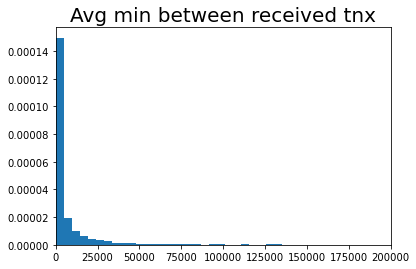

In [60]:
# As some final sifting, now that the features have been selected and the data has been cleaned, I'd like to see some 
# visualizations of my final data. Like many of my previous graphs, the data is concentrated almost entirely on the low end of
# the x-axis, but the graph is also distored by strong outliers. Using RFECV somewhat sidestepped the issue of a comparatively 
# small number of outliers whereas the PCA would be more susceptible to it as very strong but few outliers would distort its 
# variance calculation.

plt.hist(final_features['Avg min between received tnx'], density = True, bins = 100)
plt.xlim([0,200000])
plt.title('Avg min between received tnx', size = 20)
plt.show()

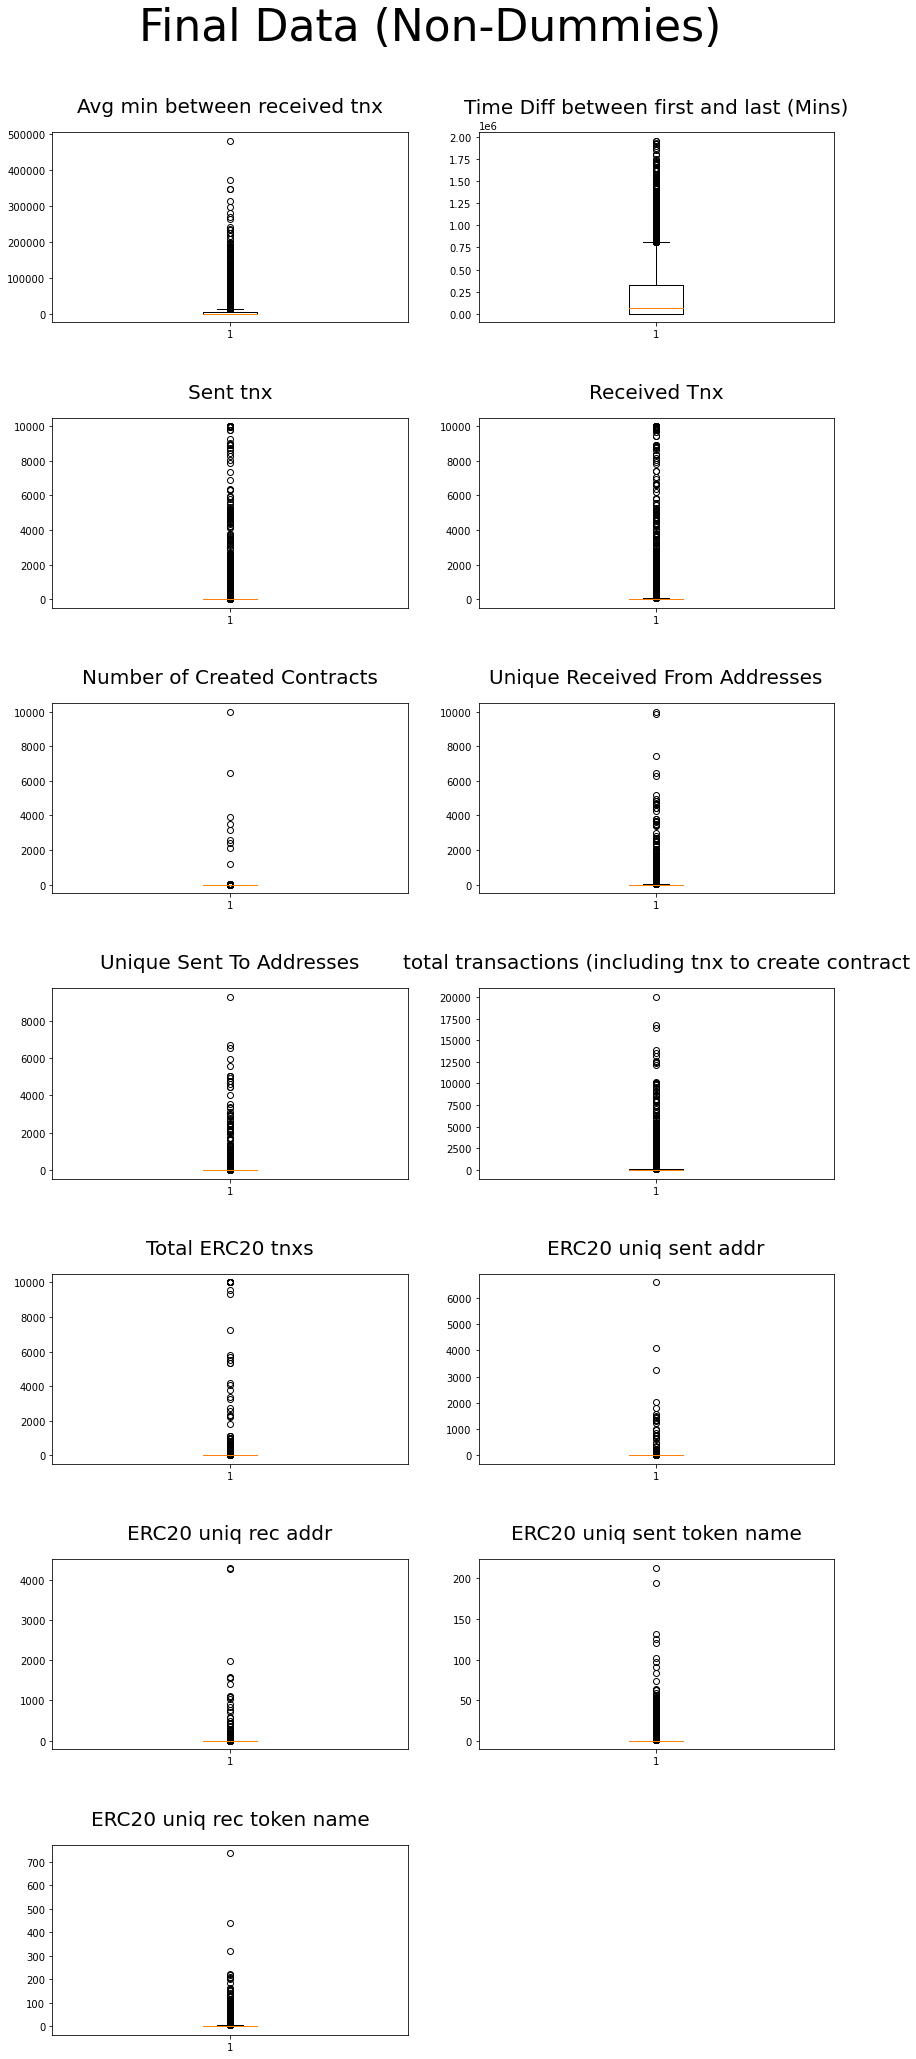

In [61]:
# Wishing to examine my final data that is not dummy variables, I've plotted them below as boxplots. The virtue of the boxplots 
# is I do not have to spend so much time fine-tuning the graph to see what the data is telling me, unlike my experience with the
# histograms or probability density functions have been so far. As can be seen below, the data tneds to cluster very strongly in
# the low end of the data distribution, with substantial numbers of outlier values (but comparatively few when considered 
# against the total number of values) . Given this general characterist of my data, I felt that RFECV was well-suited for my 
# feature selection as ANOVA and variance thresholding would have relied on some amount of variance analysis and these data 
# would have been very strongly distorted in terms of their variance due to these outliers. 

fig, axes = plt.subplots(7,2, figsize = (14,35))
fig.delaxes(axes[6,1])
counter = 0
for i in range(7):
    for n in range(2):
        axes[i,n].boxplot(final_features.iloc[:, counter])
        axes[i,n].set_title(f"{final_features.columns[counter]}", size = 20, pad = 20)
        counter +=1
        if counter == 14:
            break
plt.subplots_adjust(hspace = 0.5)            
fig.suptitle("Final Data (Non-Dummies)", fontsize = 44, y = 0.93)
plt.show()

Using various dataframes I was able to whittle down what collection of data would yield the likely best tradeoff between keeping as much data as possible and removing, or imputing, excessive NaN's. I decided that imputing values to the NaN's, given that they were concentrated in the target data (the rows flagged as fraudulent) would likely corrupt the final model as, whether I imputed the mean, the median, or the mode, I would be creating data for approximately a third of my rows associated with the fraudulent flag. Once I saw that the RFECV algorithm was able to select 50 features for my final model to use, as opposed to the single feature in the data that removed the ERC columns altogether (the columns where the NaN's were concentrated), I knew that the best dataframe to use would be one that removed the rows with the NaN values but kept the columns. I examined some of my final data graphically, but found that it was very similar to what I had seen before in my data: strong clustering on the low end of the data spectrum, with a few outliers strongly distorting the scale of the graphs if not controlled for. I presented a histogram of one of my final features, but given its readability and how finicky the graph was I decided to try some boxplots instead. The boxplots were very clear and informative and easy to read, and showed how although the data is predominantly on the lower end and the number of outliers (relative to the total sample size) is small, in absolute terms the number of outliers is considerable. For feature selection this means that RFECV was the best way to go as variance thresholding and ANOVA F-value would necessarily rely on variance calculations which could be strongly distorted by these outliers. For feature extraction, PCA would also likely perform poorly as the amount of variance in my data would distort its calculations (this is borne out by my earlier comparisons of PCA against my RFECV values wherein I found that despite retaining only 20% of the variance in the data it was still retaining more features than the RFECV recommended). At this point I believe that my data is cleaned and prepped for modeling analysis at the next milestone, and I am eager to see the results.

# Milestone 3:

In this milestone I am to select, and build a proper model (along with hyperparameter tuning) for the analysis of my dataset. I shall also evaluate the efficacy of my models as needed to compare them, and of course the final model shall be evaluated on the quality of its predictions. Given that I have already selected the useful features for this work in a previous milestone, I will use them in my upcoming work. 

In [62]:
# Importing likley useful modules.

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [63]:
# Due to the tremendous amount of calculations in carrying out the RFECV analysis to produce my final_features dataframe, I am 
# am saving my final dataframe to my harddrive so that I can read it back into this notebook without waiting the 
# approximately 1.5 hours it takes to perform that particluar test.

final_features.to_csv(r"C:\Users\ripva\Desktop\Masters degree stuff\DSC550\Data\final_features.csv", index = False)

In [64]:
# Checking my work to ensure that I have properly exported my dataframe. It turns out that I have to reset the dataframe
# index to make the comparison between the two work as the original final_features kept the index numbers from before rows
# were dropped. Once I reset the index they should be directly comparable.

final_features_check = pd.read_csv(r"C:\Users\ripva\Desktop\Masters degree stuff\DSC550\Data\final_features.csv")
final_features_check2 = final_features.reset_index(drop = True)
final_features_check2


,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,total transactions (including tnx to create contract,Total ERC20 tnxs,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20_Sent_Token__,ERC20_Sent_Token__,ERC20_Sent_Token__0,ERC20_Sent_Token__Bancor,ERC20_Sent_Token__Crypto.com,ERC20_Sent_Token__DICE,ERC20_Sent_Token__Ether,ERC20_Sent_Token__MobileGo,ERC20_Sent_Token__None,ERC20_Sent_Token__Pundi X Token,ERC20_Sent_Token__Qtum,ERC20_Sent_Token__Reputation,ERC20_Sent_Token__TAAS,ERC20_Sent_Token__Tronix,ERC20_Sent_Token__UG Token,ERC20_Sent_Token__WIKI Token,ERC20_Sent_Token__WINGS,ERC20_Rec_Token__,ERC20_Rec_Token__0,ERC20_Rec_Token__Aragon,ERC20_Rec_Token__BAT,ERC20_Rec_Token__Blockwell say NOTSAFU,ERC20_Rec_Token__EOS,ERC20_Rec_Token__ERC20,ERC20_Rec_Token__Free BOB Tokens - BobsRepair.com,ERC20_Rec_Token__GSENetwork,ERC20_Rec_Token__ICONOMI,ERC20_Rec_Token__Lino,ERC20_Rec_Token__None,ERC20_Rec_Token__OCoin,ERC20_Rec_Token__Promodl,ERC20_Rec_Token__Reputation,ERC20_Rec_Token__SONM,ERC20_Rec_Token__TIME,ERC20_Rec_Token__VIU,ERC20_Rec_Token__Veritaseum,ERC20_Rec_Token__WinETHFree
0,1093.71,704785.63,721,89,0,40,118,810,265.0,30.0,54.0,39.0,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2958.44,1218216.73,94,8,0,5,14,102,8.0,1.0,5.0,1.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2434.02,516729.30,2,10,0,10,2,12,8.0,0.0,7.0,0.0,8.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15785.09,397555.90,25,9,0,7,13,34,14.0,2.0,11.0,1.0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10707.77,382472.42,4598,20,1,7,19,4619,42.0,4.0,23.0,6.0,27.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9007,0.00,0.00,0,0,0,0,0,0,2.0,0.0,2.0,0.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9008,631.39,58748.48,4,13,0,11,4,17,2.0,0.0,2.0,0.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9009,0.00,0.00,0,0,0,0,0,0,1.0,0.0,1.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9010,2189.29,261601.88,67,43,0,31,44,110,5.0,0.0,5.0,0.0,5.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
# Checking that all of the features are equal to each other. They are. As needed, in the future, I shall use my copy of 
# my final dataframe to avoid the extra 1.5 hours of analysis time required to repeat the RFECV

(final_features_check == final_features_check2).all().all()

True

In [66]:
# I performed a broad sweep in this cell, examining whether it was better to use the StandardScaler or the MinMaxScaler, as
# well as whether the LogisticRegression, RandomForestClassifier, or the KNeighborsClassifier were the better classifiers.
# I went with 'sag' and 'saga' as my solver options for the logistic regression given the size of the dataset I am working 
# with (attempts with liblinear took prohibitively long and failed to converge), and I also examined the appropriate 
# penalties for those solvers. For the C value I took a range of log values from -1 to 4, testing for the very small and 
# fairly large values. For the RandomForestClassifier I set the max_features parameter to the square root of the 
# number of features, as I had read online that the square root of the number of features was a good value for logistic
# classification. I also stratified my splitting of the data to ensure that the proportion of fraudulent data was held
# constant in the split (given that the data was imbalanced in that regard, I was concerned that it might otherwise lead
# to a split that didn't reflect the actual underlying proportions in the target data). For the KneighborsClassifier, I
# tried allowing up to 10 neighbors to see if I could get some good performance at a variety of levels. When I allow the
# penalty parameter to equal 'none' it generates a nuisance warning repeatedly, so some scrolling must be done to reach the
# result. The final and best model was found to be a RandomForestClassifier with n_estimators =100.

standardizer = StandardScaler()

scaler = MinMaxScaler()

final_features_train, final_features_test, final_target_train, final_target_test = train_test_split(final_features,
                                                                                                    final_target,
                                                                                                   test_size = 0.2,
                                                                                                   random_state = 1,
                                                                                                   stratify = final_target)

pipe = Pipeline([("standardizer", standardizer), ('classifier', RandomForestClassifier())])

search_space = [{'standardizer': [standardizer],
                'standardizer': [scaler]},
                {'classifier': [LogisticRegression(n_jobs =-1)],
                 'classifier__solver': ['sag'],
                 'classifier__penalty': ['l2', 'none'], 
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['elasticnet', 'l1', 'l2', 'none'],
                 'classifier__C': np.logspace(-1, 4, 100)},
                {'classifier': [RandomForestClassifier(n_jobs =-1)],
                'classifier__n_estimators': [10,100,1000],
                'classifier__max_features': ['sqrt']},
                {'classifier': [KNeighborsClassifier(n_jobs = -1)],
                'classifier__n_neighbors': [1,2,3,4,5,6,7,8,9,10]}]

classifier2 = GridSearchCV(pipe, search_space, cv = 5).fit(final_features_train, final_target_train)
classifier2.best_estimator_.get_params()


C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ripva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

{'memory': None,
 'steps': [('standardizer', MinMaxScaler()),
  ('classifier', RandomForestClassifier())],
 'verbose': False,
 'standardizer': MinMaxScaler(),
 'classifier': RandomForestClassifier(),
 'standardizer__clip': False,
 'standardizer__copy': True,
 'standardizer__feature_range': (0, 1),
 'classifier__bootstrap': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__class_weight': None,
 'classifier__criterion': 'gini',
 'classifier__max_depth': None,
 'classifier__max_features': 'auto',
 'classifier__max_leaf_nodes': None,
 'classifier__max_samples': None,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__n_estimators': 100,
 'classifier__n_jobs': None,
 'classifier__oob_score': False,
 'classifier__random_state': None,
 'classifier__verbose': 0,
 'classifier__warm_start': False}

In [67]:
# The above analysis took over 20 minutes to run, but the results were worth it. The model produced by this procedure
# scores perfectly on the training data, which can be worrying with any decision-tree-type model as there can be some 
# overfitting, but it scores almost as well on the test data. I will follow up with an ROC, AUC, F1, recall, and precision
# analysis as well as a confusion matrix. I had thought about including a graph of the final decision tree, but we shall 
# see how that looks given the amount of information I'm dealing with (it may be too cluttered to be useful).

result = classifier2.predict(final_features_test)
result_train = classifier2.predict(final_features_train)
print(f"The accuracy of the model on the training data = {accuracy_score(final_target_train, result_train)*100}%.")
print(f"The accuracy of the model on the test data = {round(accuracy_score(final_target_test, result),4)*100}%.")

The accuracy of the model on the training data = 100.0%.
The accuracy of the model on the test data = 99.39%.


In [68]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [69]:
# From what we can see below, the model's accuracy is not compromised by a tendancy to either over or under predict 
# positives. The accuracy, recall, precision, and f1 scores all show very good agreement with each other and show a model
# with tight and responsive predictions.


print(f"The precision of the model on the training data = {precision_score(final_target_train, result_train)*100}%.")
print(f"The precision of the model on the test data = {round(precision_score(final_target_test, result),4)*100}%.")
print(f"The recall of the model on the training data = {recall_score(final_target_train, result_train)*100}%.")
print(f"The recall of the model on the test data = {round(recall_score(final_target_test, result),4)*100}%.")
print(f"The f1 score of the model on the training data = {f1_score(final_target_train, result_train)*100}%.")
print(f"The f1 score of the model on the test data = {round(f1_score(final_target_test, result),4)*100}%.")

The precision of the model on the training data = 100.0%.
The precision of the model on the test data = 99.62%.
The recall of the model on the training data = 100.0%.
The recall of the model on the test data = 96.3%.
The f1 score of the model on the training data = 100.0%.
The f1 score of the model on the test data = 97.92999999999999%.


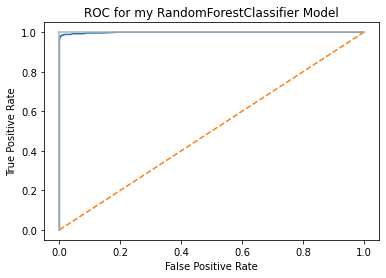

In [70]:
# Next I will examine my model's performance graphically with an ROC curve. It is almost identical to the 'gray' line that
# travels from the origin up to 0,1 and then travels horizontally to 1,1. There is a slight deviation away from it below
# the x = 0.1 range, but beyond x = 0.1 or so it is perfect. This will be borne out in the next cell with an AUC score that
# I anticipate will be very nearly 1.

from sklearn.metrics import roc_curve, roc_auc_score

target_probabilities = classifier2.predict_proba(final_features_test)[:,1]

false_positive_rate, true_positive_rate, threshold = roc_curve(final_target_test, target_probabilities)

plt.title("ROC for my RandomForestClassifier Model")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls = '--')
plt.plot([0,0], [0,1], c= '0.7')
plt.plot([1,1], c = '.7')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [71]:
# Demonstrating that the AUC score for my model is nearly perfect.

print(f"The Area Under the Curve (AUC) score for my ROC graph above is \
{roc_auc_score(final_target_test, target_probabilities)}, which is very near to a \nperfect score of '1'.")

The Area Under the Curve (AUC) score for my ROC graph above is 0.998814959773864, which is very near to a 
perfect score of '1'.


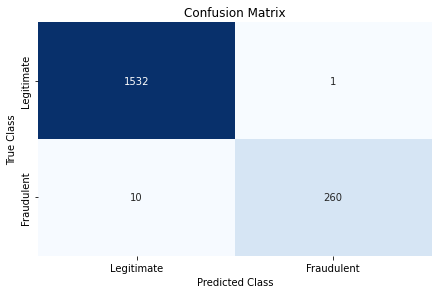

When it comes to the 'legitimate' category, my model is correct in 99.35% of its predictions as compared to
it's accurracy in the 'fraudulent' category, in which it is correct 99.62% of the time.


In [72]:
# Now I will create a confusion matrix of my model's predictions to clearly see the nuances of its performance. As can be
# seen, my model almost perfectly predicts fraudulent transactions (only having one false 'fraudulent'), but it struggles
# a litte more when it comes to predicting legitimate transactions, having ten false 'legitimates'. However, given the 
# much greater size of 'legitimate' category, it's percent correct is much closer to equal with the 'fraudulent'
# category than may first be guessed.

from sklearn.metrics import confusion_matrix
import seaborn as sns

class_names = ['Legitimate', 'Fraudulent']

target_predicted = classifier2.predict(final_features_test)

matrix = confusion_matrix(final_target_test, target_predicted)

dataframe = pd.DataFrame(matrix, index = class_names, columns = class_names)

sns.heatmap(dataframe, annot = True, cbar = None, cmap = 'Blues', fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(f"When it comes to the 'legitimate' category, my model is correct in {round((1532/1542)*100, 2)}% of its \
predictions as compared to\nit's accurracy in the 'fraudulent' category, in which it is correct \
{round((260/261)*100,2)}% of the time.")

In [73]:
# Having seen just how well my model does so far, it is tempting to simply quite and take the neary perfect results, but 
# given the hyper-parameter tuning that took place in the grid search, I wonder if I focused more on my 
# RandomForestClassifier model would I get better results. I will now create another pipeline for just my 
# RandomForestClassifier model, but I will increase the tuning options for the parameters of interest in the search_space. It 
# ends up selecting a value of 60 for the n_estimators parameter (in the original model, 100 had been selected from the three 
# options of 10, 100, and 1000; it looks like my more granular approach may have borne fruit).

pipe2 = Pipeline([('standardizer', standardizer), ('classifier', RandomForestClassifier())])

search_space2 = [{'classifier': [RandomForestClassifier(n_jobs =-1)],
                'classifier__n_estimators': [10,20,30, 40, 50, 60, 70, 80, 90, 100, 150,
                                             200, 250 ,300 ,350, 400, 450, 500],
                'classifier__max_features': ['sqrt']}]

classifier3 = GridSearchCV(pipe2, search_space2, cv = 5).fit(final_features_train, final_target_train)
classifier3.best_estimator_.get_params()

{'memory': None,
 'steps': [('standardizer', StandardScaler()),
  ('classifier',
   RandomForestClassifier(max_features='sqrt', n_estimators=70, n_jobs=-1))],
 'verbose': False,
 'standardizer': StandardScaler(),
 'classifier': RandomForestClassifier(max_features='sqrt', n_estimators=70, n_jobs=-1),
 'standardizer__copy': True,
 'standardizer__with_mean': True,
 'standardizer__with_std': True,
 'classifier__bootstrap': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__class_weight': None,
 'classifier__criterion': 'gini',
 'classifier__max_depth': None,
 'classifier__max_features': 'sqrt',
 'classifier__max_leaf_nodes': None,
 'classifier__max_samples': None,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__n_estimators': 70,
 'classifier__n_jobs': -1,
 'classifier__oob_score': False,
 'classifier__random_state': None,
 'classifier__verbose': 0,
 'classifier__

In [74]:
# Tuning the n_estimators parameter further resulted in a slight increase in accuracy on the test data, showing a 0.11% 
# gain.

result2 = classifier3.predict(final_features_test)
result_train2 = classifier3.predict(final_features_train)
difference = accuracy_score(final_target_test, result2) - accuracy_score(final_target_test, result)

print(f"The accuracy of the model on the training data = {accuracy_score(final_target_train, result_train2)*100}%.")
print(f"The accuracy of the model on the test data = {round(accuracy_score(final_target_test, result2),4)*100}%.")
print(f"The accuracy of the old model on the test data = {round(accuracy_score(final_target_test, result),4)*100}%.")
print(f"The new model shows an increase in accuracy of {round(difference*100, 4)}%")

The accuracy of the model on the training data = 100.0%.
The accuracy of the model on the test data = 99.33%.
The accuracy of the old model on the test data = 99.39%.
The new model shows an increase in accuracy of -0.0555%


In [75]:
# Narrowing my hyperparameter tuning in the n_estimators parameter to optimize it to its ideal value. The result is that the
# best n_estimator value is found to be 64.

pipe2 = Pipeline([('standardizer', standardizer), ('classifier', RandomForestClassifier())])

search_space3 = [{'classifier': [RandomForestClassifier(n_jobs =-1)],
                'classifier__n_estimators': [51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69],
                'classifier__max_features': ['sqrt']}]

classifier4 = GridSearchCV(pipe2, search_space3, cv = 5).fit(final_features_train, final_target_train)
classifier4.best_estimator_.get_params()

{'memory': None,
 'steps': [('standardizer', StandardScaler()),
  ('classifier',
   RandomForestClassifier(max_features='sqrt', n_estimators=67, n_jobs=-1))],
 'verbose': False,
 'standardizer': StandardScaler(),
 'classifier': RandomForestClassifier(max_features='sqrt', n_estimators=67, n_jobs=-1),
 'standardizer__copy': True,
 'standardizer__with_mean': True,
 'standardizer__with_std': True,
 'classifier__bootstrap': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__class_weight': None,
 'classifier__criterion': 'gini',
 'classifier__max_depth': None,
 'classifier__max_features': 'sqrt',
 'classifier__max_leaf_nodes': None,
 'classifier__max_samples': None,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__n_estimators': 67,
 'classifier__n_jobs': -1,
 'classifier__oob_score': False,
 'classifier__random_state': None,
 'classifier__verbose': 0,
 'classifier__

In [76]:
# Tuning the hyperparameter even further shows that I've engaged in very minor overfitting, which caused us to regress in
# our accuracy back to just a little less than our original model. To be thorough I will assess these two new models as 
# I assessed the first model, just to be sure that our models really perform just as our accuracy would suggest.

result3 = classifier4.predict(final_features_test)
result_train3 = classifier4.predict(final_features_train)

print(f"The accuracy of the new model on the training data = {accuracy_score(final_target_train, result_train3)*100}%.")
print(f"The accuracy of the new model on the test data = {round(accuracy_score(final_target_test, result3),4)*100}%.")
print(f"The accuracy of the old model on the test data = {round(accuracy_score(final_target_test, result),4)*100}%.")

The accuracy of the new model on the training data = 100.0%.
The accuracy of the new model on the test data = 99.45%.
The accuracy of the old model on the test data = 99.39%.


In [77]:
# This is actually an improvement over the first model in all respects in which they don't tie. Specifically, the precision
# is higher, the recall is higher, and the f1 score is higher (all for test data).

print(f"The precision of the second model on the training data = \
{precision_score(final_target_train, result_train2)*100}%.")
print(f"The precision of the second model on the test data = {round(precision_score(final_target_test, result2),4)*100}%.")
print(f"The recall of the second model on the training data = {recall_score(final_target_train, result_train2)*100}%.")
print(f"The recall of the second model on the test data = {round(recall_score(final_target_test, result2),4)*100}%.")
print(f"The f1 score of the second model on the training data = {f1_score(final_target_train, result_train2)*100}%.")
print(f"The f1 score of the second model on the test data = {round(f1_score(final_target_test, result2),4)*100}%.")

The precision of the second model on the training data = 100.0%.
The precision of the second model on the test data = 99.24%.
The recall of the second model on the training data = 100.0%.
The recall of the second model on the test data = 96.3%.
The f1 score of the second model on the training data = 100.0%.
The f1 score of the second model on the test data = 97.74000000000001%.


In [78]:
# The precision and the f1 score are both worse than the first model (test data), but the recall is slightly better. 
# However, this model is worse in all respects than the second model, except where they tie. The second model wins again
# on precision and f1 score, and ties with the second model on recall.                 

print(f"The precision of the third model on the training data = \
{precision_score(final_target_train, result_train2)*100}%.")
print(f"The precision of the third model on the test data = {round(precision_score(final_target_test, result3),4)*100}%.")
print(f"The recall of the third model on the training data = {recall_score(final_target_train, result_train3)*100}%.")
print(f"The recall of the third model on the test data = {round(recall_score(final_target_test, result3),4)*100}%.")
print(f"The f1 score of the third model on the training data = {f1_score(final_target_train, result_train3)*100}%.")
print(f"The f1 score of the third model on the test data = {round(f1_score(final_target_test, result3),4)*100}%.")

The precision of the third model on the training data = 100.0%.
The precision of the third model on the test data = 99.62%.
The recall of the third model on the training data = 100.0%.
The recall of the third model on the test data = 96.67%.
The f1 score of the third model on the training data = 100.0%.
The f1 score of the third model on the test data = 98.11999999999999%.


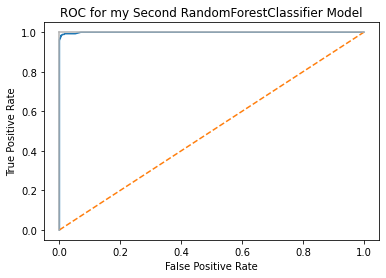

The AUC score for this graph is 0.9993754680969293.
The AUC score for the first model's graph is 0.998814959773864.
The difference in scores is -0.0005605083230653118 in favor of the first model.


In [79]:
# Next I would like to examine the ROC curves and AUC scores for the second and third models. The second model looks very
# similar to the first graph, but it is ever so slightly worse than the first model (I would consider the difference 
# neglible)

target_probabilities2 = classifier3.predict_proba(final_features_test)[:,1]

false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(final_target_test, target_probabilities2)

plt.title("ROC for my Second RandomForestClassifier Model")
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0,1], ls = '--')
plt.plot([0,0], [0,1], c= '0.7')
plt.plot([1,1], c = '.7')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

print(f"The AUC score for this graph is {roc_auc_score(final_target_test, target_probabilities2)}.")
print(f"The AUC score for the first model's graph is {roc_auc_score(final_target_test, target_probabilities)}.")

AUC2 = roc_auc_score(final_target_test, target_probabilities2)  
AUC1 = roc_auc_score(final_target_test, target_probabilities)
print(f"The difference in scores is {AUC1-AUC2} in favor of the first model.")

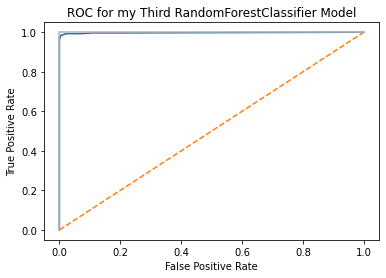

The AUC score for this graph is 0.9973496653861951.
The AUC score for the first model's graph is 0.998814959773864.
The difference in scores is 0.0014652943876689584 in favor of the first model.


In [80]:
# Again, a trivial difference from the first model in this regard.

target_probabilities3 = classifier4.predict_proba(final_features_test)[:,1]

false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(final_target_test, target_probabilities3)

plt.title("ROC for my Third RandomForestClassifier Model")
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0,1], ls = '--')
plt.plot([0,0], [0,1], c= '0.7')
plt.plot([1,1], c = '.7')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

print(f"The AUC score for this graph is {roc_auc_score(final_target_test, target_probabilities3)}.")
print(f"The AUC score for the first model's graph is {roc_auc_score(final_target_test, target_probabilities)}.")
AUC3 = roc_auc_score(final_target_test, target_probabilities3)  
AUC1 = roc_auc_score(final_target_test, target_probabilities)
print(f"The difference in scores is {AUC1-AUC3} in favor of the first model.")

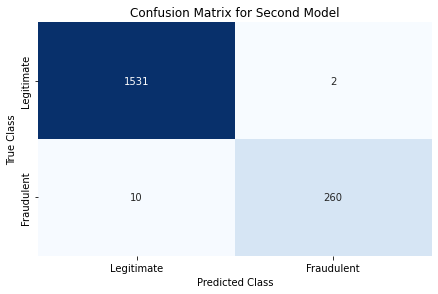

When it comes to the 'legitimate' category, my second model is correct in 99.42% of its predictions as compared to
it's accurracy in the 'fraudulent' category, in which its predictions are correct 100.0% of the time.


In [81]:
# As can be seen, the second model now predicts the 'fraudulent' with no false 'legitimates', and slightly improves over 
# the first model's ability to predict the 'legitimate category'.

class_names = ['Legitimate', 'Fraudulent']

target_predicted2 = classifier3.predict(final_features_test)

matrix2 = confusion_matrix(final_target_test, target_predicted2)

dataframe2 = pd.DataFrame(matrix2, index = class_names, columns = class_names)

sns.heatmap(dataframe2, annot = True, cbar = None, cmap = 'Blues', fmt = 'g')
plt.title("Confusion Matrix for Second Model"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(f"When it comes to the 'legitimate' category, my second model is correct in {round((1533/1542)*100, 2)}% of its \
predictions as compared to\nit's accurracy in the 'fraudulent' category, in which its \
predictions are correct {round((261/261)*100,2)}% of the time.")

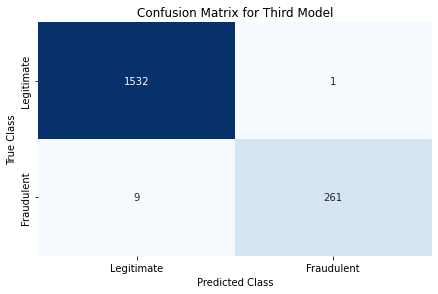

When it comes to the 'legitimate' category, my second model is correct in 99.42% of its predictions as compared to
it's accurracy in the 'fraudulent' category, in which its predictions are correct 98.86% of the time.


In [82]:
# The third model shows fewer false 'legitimates' relative to the first model, but substantially more false "fraudulents".
# After examining all of the models, it appears the second model (referred to as classifier3) is the superior model.

class_names = ['Legitimate', 'Fraudulent']

target_predicted3 = classifier4.predict(final_features_test)

matrix3 = confusion_matrix(final_target_test, target_predicted3)

dataframe3 = pd.DataFrame(matrix3, index = class_names, columns = class_names)

sns.heatmap(dataframe3, annot = True, cbar = None, cmap = 'Blues', fmt = 'g')
plt.title("Confusion Matrix for Third Model"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(f"When it comes to the 'legitimate' category, my second model is correct in {round((1530/1539)*100, 2)}% of its \
predictions as compared to\nit's accurracy in the 'fraudulent' category, in which its \
predictions are correct {round((261/264)*100,2)}% of the time.")

In [83]:
# Next I will move on to visualizing my model. Given that it is a random forest classifier there will be more than one tree
# to visualize. Below I show that there are 60 different decision trees that make up my random forest classifier. Visualizing 
# all of them would be time-consuming and provide us with no real benifit, but I could visualize a single tree. I will do that 
# in the next cell.

len(classifier3.best_estimator_._final_estimator.estimators_)

70

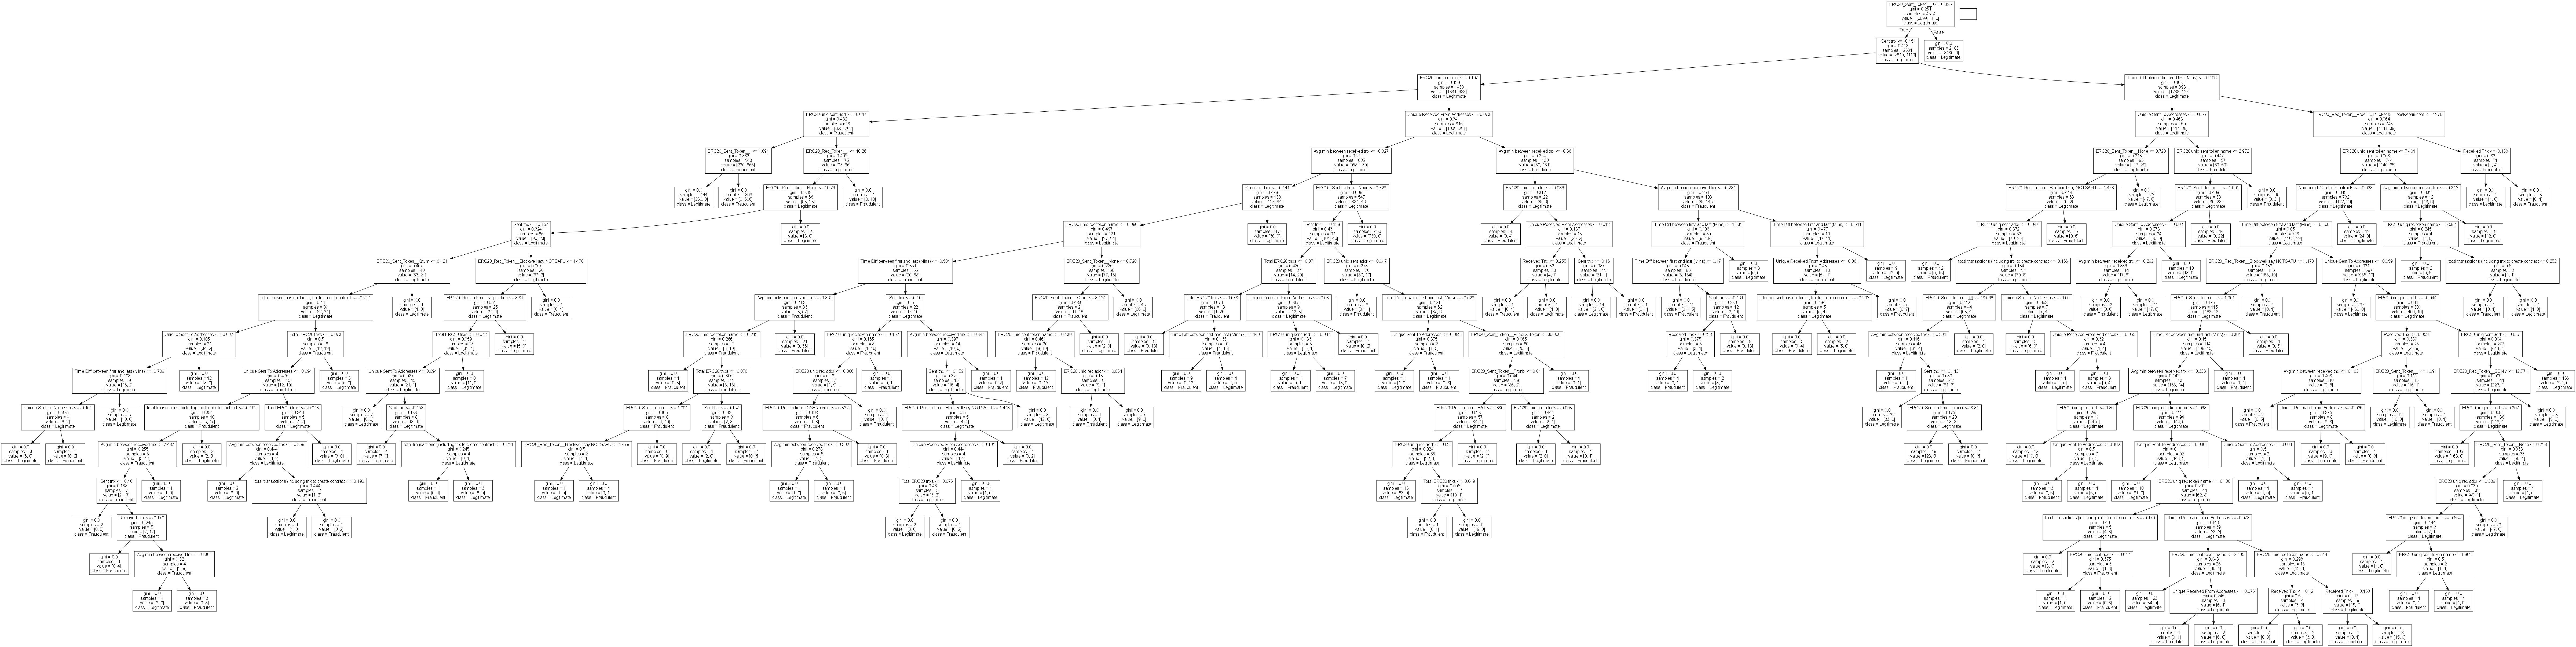

In [84]:
# Due to the size of this decision tree, it can only be read while substantially zoomed in. I'll provide an image in the next
# cell of the graph not zoomed in so that the scale can be understood. This window does however allow for zooming around as 
# anyone may wish, though it is not the best way to enjoy a decision tree. Given that the data was subject to scaling the 
# values presented in the boxes aren't directly understandable, but the magnitude of the values sorted by these criteria are.
# For instance, the 'Total ERC20 tnxs' splits the tree roughly in half on the basis of one decision, labeling transactions as 
# legitimate if they fall below a certain threshold (2195 samples deemed legitimate in a leaf node out of a total of 
# 4524 samples).

import pydotplus
from IPython.display import Image
from sklearn import tree

dot_data = tree.export_graphviz(classifier3.best_estimator_._final_estimator.estimators_[0], 
                                out_file = None, feature_names = final_features_test.columns, 
                                class_names = ['Legitimate', 'Fraudulent'])
graph= pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"100,100!"')
Image(graph.create_png())


(process:4260): GLib-GIO-WARNING **: 22:43:32.717: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2303.17.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:4260): GLib-GIO-WARNING **: 22:43:32.764: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.6.2.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



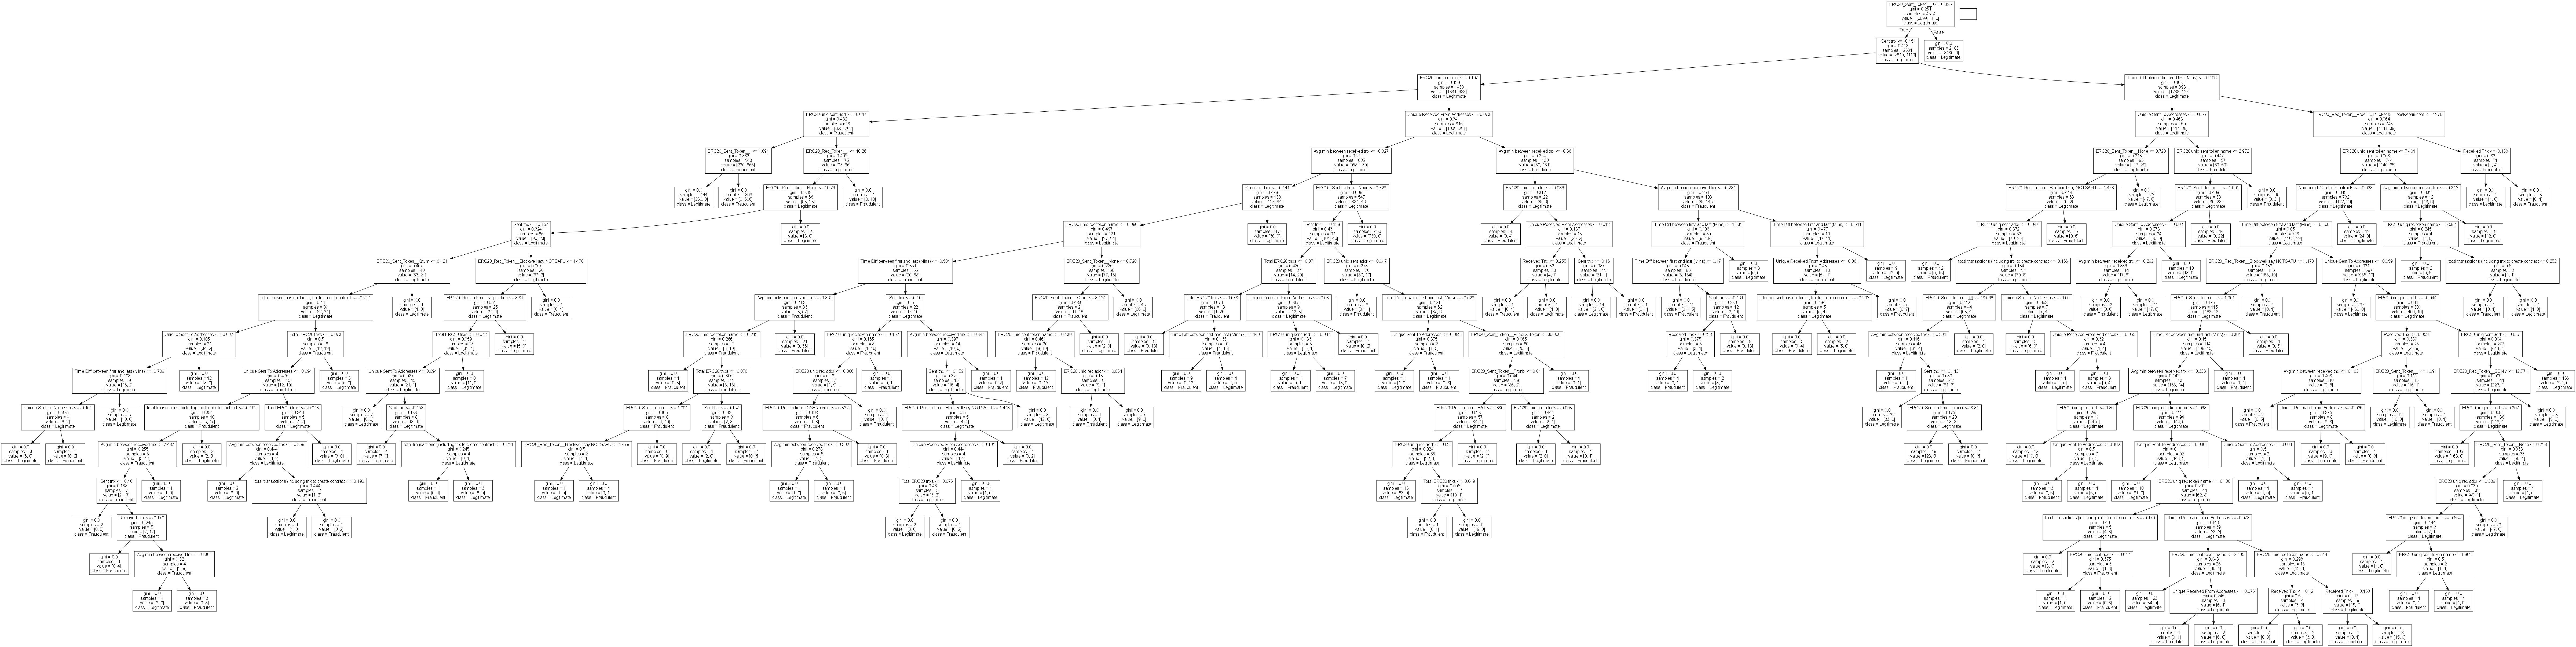

In [85]:
# Here is the same decision tree presented in its fully-zoomed-out form. it is quite large, but given the quality of the model
# and the number of features, this is not surprising.

dot_data = tree.export_graphviz(classifier3.best_estimator_._final_estimator.estimators_[0], 
                                out_file = None, feature_names = final_features_test.columns, 
                                class_names = ['Legitimate', 'Fraudulent'])
graph= pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"100,100!"')
Image(graph.create_png())

# Summary of Milestone 3 Efforts and Results:

I used a grid search as well as a pipeline to streamline my efforts to find the best data scaler as well as the best model for the analysis of my data. For the scalers I examined StandardScaler and MinMaxScaler, and for the models I examined KNeighborsClassifier, LogisticRegression, and RandomForestClassifier. Within this selection process I also tuned hyperparameters and found that ultimately the RandomForestClassifier was the best model. From that selection I fine-tuned its hyperparameters and ended up with a total of 3 models: the first was the originally selected model, the second was from a broadened search for the best n_estimators parameter, and the third was from a focused and narrow optimization of the n_estimators parameter. The first model did well, the second model was a noticeable improvement, and the third model seemed to fall victim to overfitting. Out of the three models I created, the second model (classifier3) was the best, bringing my final accuracy score to 99.5% on test data. The other data metrics for this model such as precision, recall, and f1 score were all in the high 90's as well (precision = 100%, recall = 96.67%, and f1 score = 98.31%). This model outperformed the other models in those metrics, as well as in its confusion matrix, however its AUC score was ever-so-slightly worse than the original model, however the amount was so small as to be negligible. Once I had demonstrated the superiority of the second model I moved on to a visualization, but since a random forest is made up of many tress (60 in the case of my model) there were too many to spend time graphing. I instead opted to graph a single decision tree, both in a zoomed-in and more-legible fashion (though it was such a large graph that navigating it in its zoomed in state was somewhat onerous) and a complete overview of the tree itself (which showed its scale, but was too tiny in any individual node to read). This brings milestone 3 to a close with my model selected, tuned, and evaluated. 